<a href="https://colab.research.google.com/github/CJmaz32/NCAA-March-Madness-Predictor/blob/main/Copy_of_JMM_486_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load Libraries
import pandas as pd
import numpy  as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xlsxwriter
from google.colab import drive

In [ ]:
pip install xlsxwriter

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define Parameters
Project = "CJ"
# Available Projects: "Vladimir","Alex","Ben","CJ","Daniella","Julia","Kaisar","Kendall"

Projects = ["Alex","Ben","CJ","Daniella","Julia","Kaisar","Kendall","Vladimir"]

GradStudents      = ["Alex","Daniella","Kendall"]
UnderGradStudents = ["Ben","CJ","Julia","Kaisar"]

In [ ]:
Files = []

if   Project == "CJ"       : Files = ['MRegularSeasonCompactResults.csv', '2024_tourney_seeds.csv','MTeams.csv', 'MNCAATourneySeeds.csv', 'MMasseyOrdinals_thruSeason2024_day128.csv', 'MNCAATourneySeedRoundSlots.csv', 'MRegularSeasonDetailedResults.csv', "MNCAATourneySlots.csv", 'MSeasons.csv']
print(Files)

['MRegularSeasonCompactResults.csv', '2024_tourney_seeds.csv', 'MTeams.csv', 'MNCAATourneySeeds.csv', 'MMasseyOrdinals_thruSeason2024_day128.csv', 'MNCAATourneySeedRoundSlots.csv', 'MRegularSeasonDetailedResults.csv', 'MNCAATourneySlots.csv', 'MSeasons.csv']


In [ ]:
# Define Title of the Project
if  Project == "CJ"       : DataInfo = "NCAA - Bracket - Predictions"

print(DataInfo)

NCAA - Bracket - Predictions


In [ ]:
# Define Project Source
if   Project == "CJ"       : DataSource = "https://www.kaggle.com/competitions/ncaam-march-mania-2021-spread/overview"

print(DataInfo)

NCAA - Bracket - Predictions


In [ ]:
SHAREDPATH = "/content/drive/My Drive/2024UM/DATA/" + Project.upper() + "/"
INPUTPATH  = SHAREDPATH + "INPUT/"

MYPATH     = "/content/drive/My Drive/2024UM/DATA/" + Project.upper() + "/"
OUTPUTPATH = MYPATH + "OUTPUT/"

In [ ]:
print(INPUTPATH)
print(OUTPUTPATH)

/content/drive/My Drive/2024UM/DATA/CJ/INPUT/
/content/drive/My Drive/2024UM/DATA/CJ/OUTPUT/


In [ ]:
# List all avaialble files in the input folder
ListOfFile = os.listdir(INPUTPATH)
ListOfFile.sort()
for File in ListOfFile:
  print(File)

2024_tourney_seeds.csv
ARCHIVE
MConferenceTourneyGames.csv
MMasseyOrdinals_thruSeason2024_day128.csv
MNCAATourneySeedRoundSlots.csv
MNCAATourneySeeds.csv
MNCAATourneySlots.csv
MRegularSeasonCompactResults.csv
MRegularSeasonDetailedResults.csv
MSeasons.csv
MTeams.csv
sample_submission.csv


In [ ]:
# List Selected Files for the Project and confirm if selected files are avaialble:
for file in Files:
  if file in ListOfFile:
    print(file, "is available")
  else:
    print(file, "is NOT available")

# List of files that are avaialble but not listed in the Files:
print("\n")
print("List of available but not used files:")
for file in ListOfFile:
  if file not in Files:
    print(file, "is not listed")

MRegularSeasonCompactResults.csv is available
2024_tourney_seeds.csv is available
MTeams.csv is available
MNCAATourneySeeds.csv is available
MMasseyOrdinals_thruSeason2024_day128.csv is available
MNCAATourneySeedRoundSlots.csv is available
MRegularSeasonDetailedResults.csv is available
MNCAATourneySlots.csv is available
MSeasons.csv is available


List of available but not used files:
ARCHIVE is not listed
MConferenceTourneyGames.csv is not listed
sample_submission.csv is not listed


In [ ]:
# Read the first file:
for i in range(len(Files)):
  print("#"+str(i+1),"File",Files[i],"is read as inputfile"+str(1+i))

  if Project == "Kaisar":
    inputfile = pd.read_csv(INPUTPATH + "properties.csv", skiprows=3, dtype={"ZipCode": "str"}, on_bad_lines='skip', nrows=1000)
  elif Files[i][-4:]==".csv":
    inputfile = pd.read_csv(INPUTPATH + Files[i], encoding='unicode_escape')
  elif Files[i][-5:]==".xlsx":
    inputfile = pd.read_excel(INPUTPATH + Files[i])

  print("File Dimensions:",inputfile.shape[0],"rows &",inputfile.shape[1],"columns")
  print("First 5 records:")
  display(inputfile.head(5))

  if i==0: inputfile1 =inputfile.copy()
  if i==1: inputfile2 =inputfile.copy()
  if i==2: inputfile3 =inputfile.copy()
  if i==3: inputfile4 =inputfile.copy()
  if i==4: inputfile5 =inputfile.copy()
  if i==5: inputfile6 =inputfile.copy()
  if i==6: inputfile7 =inputfile.copy()
  if i==7: inputfile8 =inputfile.copy()
  if i==8: inputfile9 =inputfile.copy()
  if i==9: inputfile10 =inputfile.copy()

#1 File MRegularSeasonCompactResults.csv is read as inputfile1
File Dimensions: 187289 rows & 8 columns
First 5 records:


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


#2 File 2024_tourney_seeds.csv is read as inputfile2
File Dimensions: 128 rows & 3 columns
First 5 records:


,Tournament,Seed,TeamID
0,M,W01,1163
1,M,W02,1235
2,M,W03,1228
3,M,W04,1120
4,M,W05,1361


#3 File MTeams.csv is read as inputfile3
File Dimensions: 378 rows & 4 columns
First 5 records:


,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2024
1,1102,Air Force,1985,2024
2,1103,Akron,1985,2024
3,1104,Alabama,1985,2024
4,1105,Alabama A&M,2000,2024


#4 File MNCAATourneySeeds.csv is read as inputfile4
File Dimensions: 2558 rows & 3 columns
First 5 records:


,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


#5 File MMasseyOrdinals_thruSeason2024_day128.csv is read as inputfile5
File Dimensions: 5243873 rows & 5 columns
First 5 records:


,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260


#6 File MNCAATourneySeedRoundSlots.csv is read as inputfile6
File Dimensions: 776 rows & 5 columns
First 5 records:


,Seed,GameRound,GameSlot,EarlyDayNum,LateDayNum
0,W01,1,R1W1,136,137
1,W01,2,R2W1,138,139
2,W01,3,R3W1,143,144
3,W01,4,R4W1,145,146
4,W01,5,R5WX,152,152


#7 File MRegularSeasonDetailedResults.csv is read as inputfile7
File Dimensions: 113241 rows & 34 columns
First 5 records:


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


#8 File MNCAATourneySlots.csv is read as inputfile8
File Dimensions: 2519 rows & 4 columns
First 5 records:


,Season,Slot,StrongSeed,WeakSeed
0,1985,R1W1,W01,W16
1,1985,R1W2,W02,W15
2,1985,R1W3,W03,W14
3,1985,R1W4,W04,W13
4,1985,R1W5,W05,W12


#9 File MSeasons.csv is read as inputfile9
File Dimensions: 40 rows & 6 columns
First 5 records:


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


In [ ]:
# Print Out Summary of the Data
print("Name: ",Project)
print("Data Details: ",DataInfo)
print("Files: ", end="")
for File in Files:
  print(File, end="")
  if File==Files[-1]: print("")
  else: print(", ", end="")

print("# Files in the Project:",len(Files))

if Project in GradStudents:
  print (Project,"is Graduate Student")
elif Project in UnderGradStudents:
  print (Project,"is Undergraduate Student")
else:
  print (Project,"is Name of the Project")

Name:  CJ
Data Details:  NCAA - Bracket - Predictions
Files: MRegularSeasonCompactResults.csv, 2024_tourney_seeds.csv, MTeams.csv, MNCAATourneySeeds.csv, MMasseyOrdinals_thruSeason2024_day128.csv, MNCAATourneySeedRoundSlots.csv, MRegularSeasonDetailedResults.csv, MNCAATourneySlots.csv, MSeasons.csv
# Files in the Project: 9
CJ is Undergraduate Student


In [ ]:
# Load the datasets
ncaatourney_seeds_df = inputfile4.copy()  # MNCAATourneySeeds.csv
massey_ordinals_df = inputfile5.copy()  # MMasseyOrdinals_thruSeason2024_day128.csv

try:
    # Filter each dataset to only include rows where the season is 2024
    ncaatourney_seeds_2024 = ncaatourney_seeds_df[ncaatourney_seeds_df['Season'] == 2024]
    massey_ordinals_2024 = massey_ordinals_df[massey_ordinals_df['Season'] == 2024]

    # Merge the two datasets on TeamID
    merged_2024_df = pd.merge(
        ncaatourney_seeds_2024, massey_ordinals_2024, on=["TeamID","Season"], how="inner"
    )

    # Display and save the merged and filtered dataset
    merged_2024_df.to_csv("merged_ncaatourney_massey_2024.csv", index=False)
    print(merged_2024_df.head())
    print("Filtered dataset saved as 'merged_ncaatourney_massey_2024.csv'")
except Exception as e:
    print(f"Error during merging and filtering: {e}")





   Season Seed  TeamID  RankingDayNum SystemName  OrdinalRank
0    2024  W01    1163              9         AP            5
1    2024  W01    1163              9        BNZ           27
2    2024  W01    1163              9        BWE            8
3    2024  W01    1163              9        DES            3
4    2024  W01    1163              9        DII            1
Filtered dataset saved as 'merged_ncaatourney_massey_2024.csv'


In [ ]:
# Load the datasets
ncaatourney_seeds_df = inputfile4.copy()  # MNCAATourneySeeds.csv
massey_ordinals_df = inputfile5.copy()  # MMasseyOrdinals_thruSeason2024_day128.csv
tourney_teams_df = inputfile2.copy()  # 2024_tourney_teams.csv

try:
    # Filter each dataset to only include rows where the season is 2024
    ncaatourney_seeds_2024 = ncaatourney_seeds_df[ncaatourney_seeds_df['Season'] == 2024]
    massey_ordinals_2024 = massey_ordinals_df[massey_ordinals_df['Season'] == 2024]

    # Ensure tourney_teams_df only contains unique TeamID values
    tourney_teams_unique = tourney_teams_df['TeamID'].drop_duplicates()

    # Merge the two datasets on TeamID
    merged_2024_df = pd.merge(
        ncaatourney_seeds_2024, massey_ordinals_2024, on=["TeamID", "Season"], how="inner"
    )

    # Filter the merged dataset to include only TeamIDs found in tourney_teams_df
    filtered_merged_2024_df = merged_2024_df[
        merged_2024_df['TeamID'].isin(tourney_teams_unique)
    ]

    # Display and save the merged and filtered dataset
    filtered_merged_2024_df.to_csv("filtered_merged_ncaatourney_massey_2024.csv", index=False)
    print(filtered_merged_2024_df.head())
    print("Filtered dataset saved as 'filtered_merged_ncaatourney_massey_2024.csv'")
except Exception as e:
    print(f"Error during merging and filtering: {e}")


   Season Seed  TeamID  RankingDayNum SystemName  OrdinalRank
0    2024  W01    1163              9         AP            5
1    2024  W01    1163              9        BNZ           27
2    2024  W01    1163              9        BWE            8
3    2024  W01    1163              9        DES            3
4    2024  W01    1163              9        DII            1
Filtered dataset saved as 'filtered_merged_ncaatourney_massey_2024.csv'


In [ ]:
# Load the final dataset and MTeams.csv
final_filtered_dataset = pd.read_csv("filtered_merged_ncaatourney_massey_2024.csv")  # Previously saved dataset
teams_df = inputfile3.copy()  # MTeams.csv

try:
    # Merge the final dataset with MTeams.csv to include team names
    final_with_team_names_df = pd.merge(
        final_filtered_dataset, teams_df, on="TeamID", how="inner"
    )

    # Drop the unnecessary columns
    final_with_team_names_df = final_with_team_names_df.drop(columns=["FirstD1Season", "LastD1Season"])

    # Save and display the updated dataset
    final_with_team_names_df.to_csv("Team-Seed-Ranking-Data.csv", index=False)
    print(final_with_team_names_df.head())
    print("Final dataset with team names saved as 'Team-Seed-Ranking-Data.csv'")
except Exception as e:
    print(f"Error during merging and filtering: {e}")

final_with_team_names_df

   Season Seed  TeamID  RankingDayNum SystemName  OrdinalRank     TeamName
0    2024  W01    1163              9         AP            5  Connecticut
1    2024  W01    1163              9        BNZ           27  Connecticut
2    2024  W01    1163              9        BWE            8  Connecticut
3    2024  W01    1163              9        DES            3  Connecticut
4    2024  W01    1163              9        DII            1  Connecticut
Final dataset with team names saved as 'Team-Seed-Ranking-Data.csv'


,Season,Seed,TeamID,RankingDayNum,SystemName,OrdinalRank,TeamName
0,2024,W01,1163,9,AP,5,Connecticut
1,2024,W01,1163,9,BNZ,27,Connecticut
2,2024,W01,1163,9,BWE,8,Connecticut
3,2024,W01,1163,9,DES,3,Connecticut
4,2024,W01,1163,9,DII,1,Connecticut
...,...,...,...,...,...,...,...
53872,2024,Z16,1255,128,TPR,149,Longwood
53873,2024,Z16,1255,128,TRK,172,Longwood
53874,2024,Z16,1255,128,TRP,167,Longwood
53875,2024,Z16,1255,128,WIL,204,Longwood


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset (ensure the file is uploaded to Colab or available at the specified path)
file_path = 'Team-Seed-Ranking-Data.csv'  # Update with the actual file path in Colab
team_seed_ranking_data = pd.read_csv(file_path)

# Filter the data to only include rows where RankingDayNum equals 128
filtered_data = team_seed_ranking_data[team_seed_ranking_data['RankingDayNum'] == 128]

# Save the filtered dataset to a CSV file
filtered_file_path = 'Filtered-Team-Seed-Ranking-Day128.csv'
filtered_data.to_csv(filtered_file_path, index=False)

# Display the first few rows of the filtered data
print("Filtered data:")
print(filtered_data.head())



Filtered data:
     Season Seed  TeamID  RankingDayNum SystemName  OrdinalRank     TeamName
821    2024  W01    1163            128        7OT           12  Connecticut
822    2024  W01    1163            128         AP            2  Connecticut
823    2024  W01    1163            128        ARG            3  Connecticut
824    2024  W01    1163            128        BAR            2  Connecticut
825    2024  W01    1163            128        BBT            3  Connecticut


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset (ensure the file is uploaded to Colab or available at the specified path)
file_path = 'Team-Seed-Ranking-Data.csv'  # Update with the actual file path in Colab
team_seed_ranking_data = pd.read_csv(file_path)

# Filter the data to only include rows where RankingDayNum equals 128
filtered_data = team_seed_ranking_data[team_seed_ranking_data['RankingDayNum'] == 128]

# Save the filtered dataset to a CSV file
filtered_file_path = 'Filtered-Team-Seed-Ranking-Day128.csv'
filtered_data.to_csv(filtered_file_path, index=False)

# Display the first few rows of the filtered data
print("Filtered data:")
print(filtered_data.head())

# Pivot the dataset to make each SystemName a column with OrdinalRank as values
pivoted_data = filtered_data.pivot(
    index='TeamName',  # Rows will be team names
    columns='SystemName',  # Columns will be ranking systems
    values='OrdinalRank'  # Values will be ordinal ranks
).reset_index()

# Save the pivoted dataset to a new CSV file
pivoted_file_path = 'Pivoted-Team-Seed-Ranking-Day128.csv'
pivoted_data.to_csv(pivoted_file_path, index=False)

# Display the first few rows of the pivoted data
print("\nPivoted data:")
print(pivoted_data.head())


Filtered data:
     Season Seed  TeamID  RankingDayNum SystemName  OrdinalRank     TeamName
821    2024  W01    1163            128        7OT           12  Connecticut
822    2024  W01    1163            128         AP            2  Connecticut
823    2024  W01    1163            128        ARG            3  Connecticut
824    2024  W01    1163            128        BAR            2  Connecticut
825    2024  W01    1163            128        BBT            3  Connecticut

Pivoted data:
SystemName TeamName   7OT    AP    ARG    BAR   BBT    BIH    BMN    BNZ  \
0             Akron  73.0   NaN  105.0  125.0  82.0  118.0  122.0  124.0   
1           Alabama   4.0  19.0   12.0   15.0  10.0   17.0   15.0    8.0   
2           Arizona   3.0   6.0    5.0    4.0   5.0    7.0    8.0    2.0   
3            Auburn  10.0  12.0    7.0    6.0   6.0    9.0   16.0    5.0   
4               BYU  45.0  20.0   16.0   12.0  24.0   25.0   18.0   14.0   

SystemName    BWE  ...    SPR    SRS    STH    STY 

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset (ensure the file is uploaded to Colab or available at the specified path)
file_path = 'Team-Seed-Ranking-Data.csv'  # Update with the actual file path in Colab
team_seed_ranking_data = pd.read_csv(file_path)

# Filter the data to only include rows where RankingDayNum equals 128
filtered_data = team_seed_ranking_data[team_seed_ranking_data['RankingDayNum'] == 128]

# Save the filtered dataset to a CSV file
filtered_file_path = 'Filtered-Team-Seed-Ranking-Day128.csv'
filtered_data.to_csv(filtered_file_path, index=False)

# Pivot the dataset to make each SystemName a column with OrdinalRank as values
pivoted_data = filtered_data.pivot(
    index='TeamName',  # Rows will be team names
    columns='SystemName',  # Columns will be ranking systems
    values='OrdinalRank'  # Values will be ordinal ranks
).reset_index()

# Filter the pivoted dataset to include only specified ranking systems
selected_systems = ["POM", "KPI", "SRS", "USA", "TPR", "STH", "SPR", "RPI", "SEL", "WIL"]
filtered_pivoted_data = pivoted_data[["TeamName"] + selected_systems]

# Merge the pivoted table back with the filtered original data on TeamName
merged_data = pd.merge(filtered_data, filtered_pivoted_data, on="TeamName", how="inner")

# Save the merged dataset to a new CSV file
merged_file_path = 'Merged-Team-Seed-Ranking-Day128.csv'
merged_data.to_csv(merged_file_path, index=False)

# Display the first few rows of the merged data
print("Merged Data:")
print(merged_data.head())


Merged Data:
   Season Seed  TeamID  RankingDayNum SystemName  OrdinalRank     TeamName  \
0    2024  W01    1163            128        7OT           12  Connecticut   
1    2024  W01    1163            128         AP            2  Connecticut   
2    2024  W01    1163            128        ARG            3  Connecticut   
3    2024  W01    1163            128        BAR            2  Connecticut   
4    2024  W01    1163            128        BBT            3  Connecticut   

   POM  KPI  SRS  USA  TPR  STH  SPR  RPI  SEL  WIL  
0  2.0  4.0  4.0  2.0  1.0  6.0  3.0  5.0  3.0  3.0  
1  2.0  4.0  4.0  2.0  1.0  6.0  3.0  5.0  3.0  3.0  
2  2.0  4.0  4.0  2.0  1.0  6.0  3.0  5.0  3.0  3.0  
3  2.0  4.0  4.0  2.0  1.0  6.0  3.0  5.0  3.0  3.0  
4  2.0  4.0  4.0  2.0  1.0  6.0  3.0  5.0  3.0  3.0  


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the merged dataset
merged_file_path = 'Merged-Team-Seed-Ranking-Day128.csv'
merged_data = pd.read_csv(merged_file_path)

# Select relevant columns for visualization (TeamName and ranking systems)
ranking_columns = ["POM", "KPI", "SRS", "USA", "TPR", "STH", "SPR", "RPI", "SEL", "WIL"]
visualization_data = merged_data[["TeamName"] + ranking_columns]

# Calculate the average rank across the selected ranking systems for each team
visualization_data['AverageRank'] = visualization_data[ranking_columns].mean(axis=1)

# Display the updated dataset with the new AverageRank column
print("Updated Data with Average Rank:")
print(visualization_data.head(10))



Updated Data with Average Rank:
      TeamName  POM  KPI  SRS  USA  TPR  STH  SPR  RPI  SEL  WIL  AverageRank
0  Connecticut  2.0  4.0  4.0  2.0  1.0  6.0  3.0  5.0  3.0  3.0          3.3
1  Connecticut  2.0  4.0  4.0  2.0  1.0  6.0  3.0  5.0  3.0  3.0          3.3
2  Connecticut  2.0  4.0  4.0  2.0  1.0  6.0  3.0  5.0  3.0  3.0          3.3
3  Connecticut  2.0  4.0  4.0  2.0  1.0  6.0  3.0  5.0  3.0  3.0          3.3
4  Connecticut  2.0  4.0  4.0  2.0  1.0  6.0  3.0  5.0  3.0  3.0          3.3
5  Connecticut  2.0  4.0  4.0  2.0  1.0  6.0  3.0  5.0  3.0  3.0          3.3
6  Connecticut  2.0  4.0  4.0  2.0  1.0  6.0  3.0  5.0  3.0  3.0          3.3
7  Connecticut  2.0  4.0  4.0  2.0  1.0  6.0  3.0  5.0  3.0  3.0          3.3
8  Connecticut  2.0  4.0  4.0  2.0  1.0  6.0  3.0  5.0  3.0  3.0          3.3
9  Connecticut  2.0  4.0  4.0  2.0  1.0  6.0  3.0  5.0  3.0  3.0          3.3


<ipython-input-35-474c3beefb31>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visualization_data['AverageRank'] = visualization_data[ranking_columns].mean(axis=1)


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the merged dataset
merged_file_path = 'Merged-Team-Seed-Ranking-Day128.csv'
merged_data = pd.read_csv(merged_file_path)

# Select relevant columns for visualization (TeamName and ranking systems)
ranking_columns = ["POM", "KPI", "SRS", "USA", "TPR", "STH", "SPR", "RPI", "SEL", "WIL"]

# Retain only the required columns: TeamName, ranking systems
visualization_data = merged_data[["TeamName"] + ranking_columns]

# Remove duplicates by grouping by TeamName and taking the mean
visualization_data = visualization_data.groupby("TeamName", as_index=False).mean()

# Calculate the average rank across the selected ranking systems for each team
visualization_data['AverageRank'] = visualization_data[ranking_columns].mean(axis=1)

# Keep only the TeamName, ranking systems, and AverageRank columns
columns_to_keep = ["TeamName"] + ranking_columns + ["AverageRank"]
final_data = visualization_data[columns_to_keep]

# Display the final dataset
print("Simplified Data:")
print(final_data.head())


Simplified Data:
  TeamName    POM    KPI    SRS   USA    TPR    STH    SPR   RPI    SEL  \
0    Akron  120.0  122.0  122.0   NaN  116.0  113.0  121.0  90.0  115.0   
1  Alabama   11.0    7.0    7.0  19.0   16.0    9.0   16.0  11.0   11.0   
2  Arizona    6.0    6.0    2.0   7.0    6.0    3.0    7.0   8.0    6.0   
3   Auburn    4.0    8.0    6.0  12.0    7.0    7.0   10.0  13.0    7.0   
4      BYU   16.0   29.0   11.0  21.0   17.0   18.0   14.0  42.0   21.0   

     WIL  AverageRank  
0  117.0   115.111111  
1   18.0    12.500000  
2   10.0     6.100000  
3   10.0     8.400000  
4   20.0    20.900000  


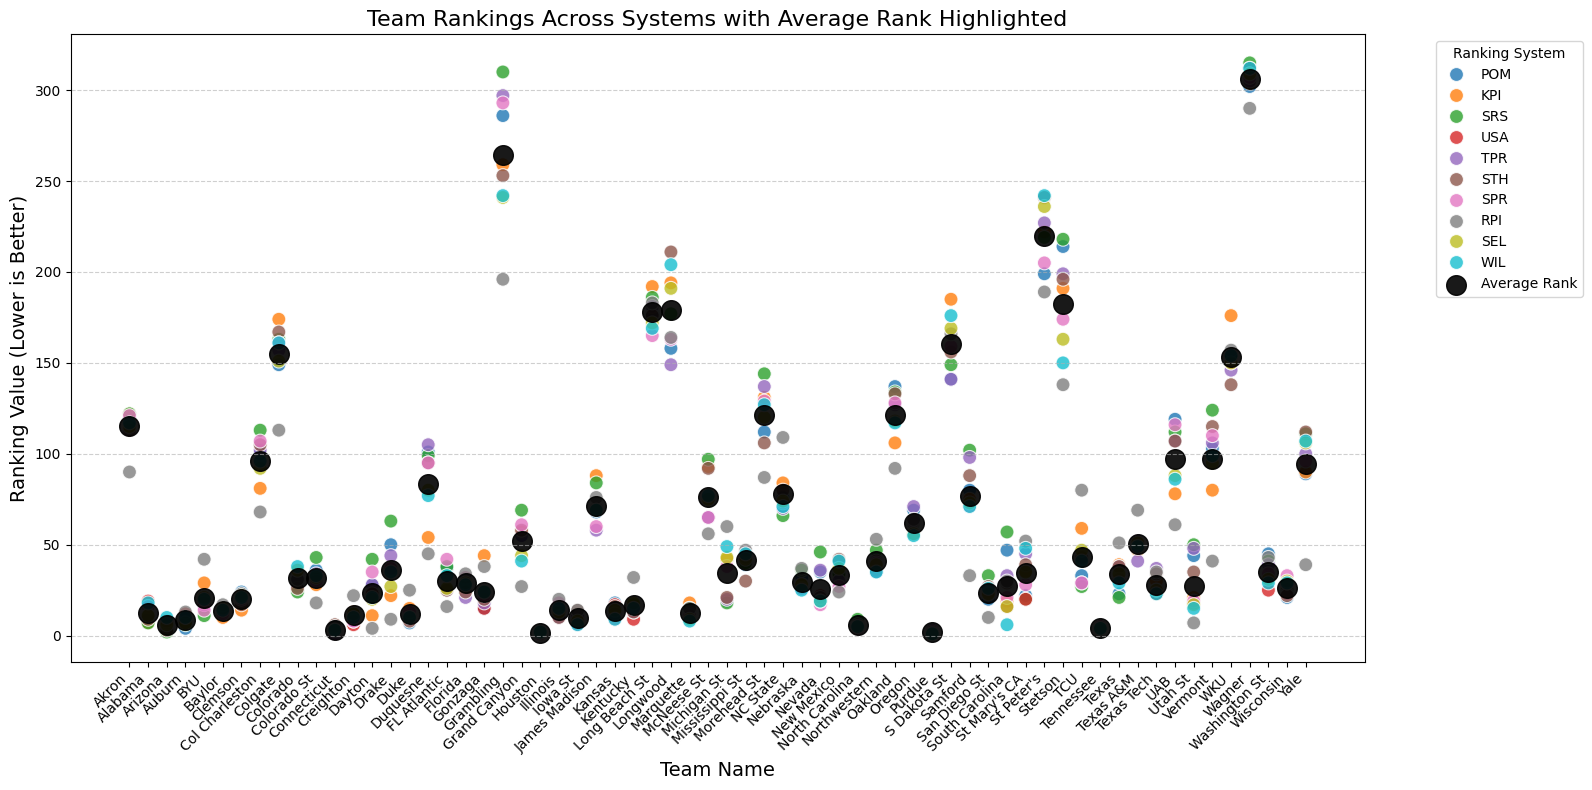

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset
merged_file_path = 'Merged-Team-Seed-Ranking-Day128.csv'
merged_data = pd.read_csv(merged_file_path)

# Select relevant columns for visualization (TeamName and ranking systems)
ranking_columns = ["POM", "KPI", "SRS", "USA", "TPR", "STH", "SPR", "RPI", "SEL", "WIL"]

# Retain only the required columns: TeamName, ranking systems
visualization_data = merged_data[["TeamName"] + ranking_columns]

# Remove duplicates by grouping by TeamName and taking the mean
visualization_data = visualization_data.groupby("TeamName", as_index=False).mean()

# Calculate the average rank across the selected ranking systems for each team
visualization_data['AverageRank'] = visualization_data[ranking_columns].mean(axis=1)

# Melt the data for visualization
melted_data = visualization_data.melt(
    id_vars=["TeamName", "AverageRank"],
    value_vars=ranking_columns,
    var_name="RankingSystem",
    value_name="RankingValue"
)

# Create the dot chart
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=melted_data,
    x="TeamName",
    y="RankingValue",
    hue="RankingSystem",
    s=100,
    alpha=0.8,
    palette="tab10"
)

# Emphasize average rank with larger black dots
plt.scatter(
    x=range(len(visualization_data["TeamName"])),
    y=visualization_data["AverageRank"],
    color="black",
    label="Average Rank",
    s=200,
    alpha=0.9
)

# Customize the chart
plt.title("Team Rankings Across Systems with Average Rank Highlighted", fontsize=16)
plt.xlabel("Team Name", fontsize=14)
plt.ylabel("Ranking Value (Lower is Better)", fontsize=14)
plt.xticks(
    ticks=range(len(visualization_data["TeamName"])),
    labels=visualization_data["TeamName"],
    rotation=45,
    ha="right"
)
plt.legend(title="Ranking System", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()




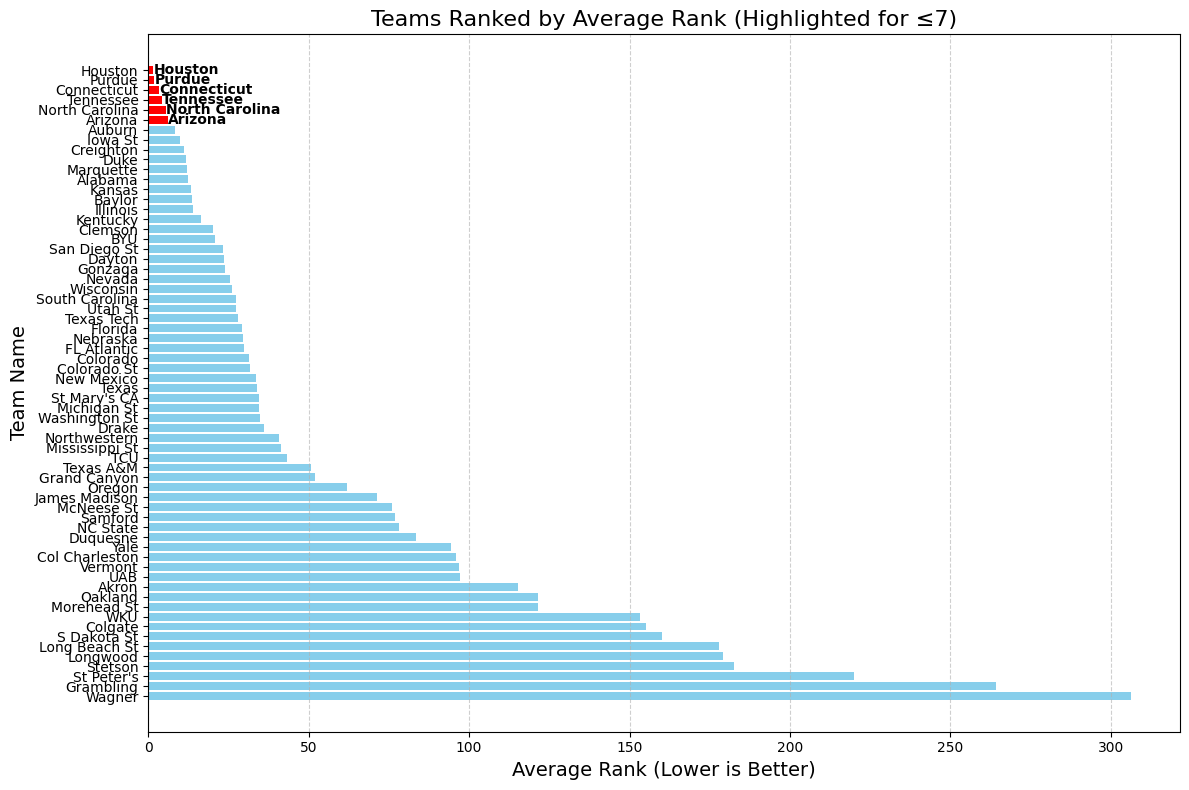

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged dataset
merged_file_path = 'Merged-Team-Seed-Ranking-Day128.csv'
merged_data = pd.read_csv(merged_file_path)

# Select relevant columns for visualization (TeamName and ranking systems)
ranking_columns = ["POM", "KPI", "SRS", "USA", "TPR", "STH", "SPR", "RPI", "SEL", "WIL"]

# Retain only the required columns: TeamName, ranking systems
visualization_data = merged_data[["TeamName"] + ranking_columns]

# Remove duplicates by grouping by TeamName and taking the mean
visualization_data = visualization_data.groupby("TeamName", as_index=False).mean()

# Calculate the average rank across the selected ranking systems for each team
visualization_data['AverageRank'] = visualization_data[ranking_columns].mean(axis=1)

# Sort the teams by their average rank in ascending order
sorted_data = visualization_data.sort_values("AverageRank")

# Highlight teams with an average rank of 7 or below
highlight_mask = sorted_data["AverageRank"] <= 7

# Create a bar chart for the average rank
plt.figure(figsize=(12, 8))

# Plot highlighted bars for teams with average rank <= 7
plt.barh(
    sorted_data["TeamName"],
    sorted_data["AverageRank"],
    color=['red' if highlight else 'skyblue' for highlight in highlight_mask]
)

# Customize the chart
plt.title("Teams Ranked by Average Rank (Highlighted for ≤7)", fontsize=16)
plt.xlabel("Average Rank (Lower is Better)", fontsize=14)
plt.ylabel("Team Name", fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show the best team at the top

# Annotate team names with bold text for highlighted teams
for i, (team, avg_rank, highlight) in enumerate(zip(sorted_data["TeamName"], sorted_data["AverageRank"], highlight_mask)):
    if highlight:
        plt.text(avg_rank + 0.1, i, f'{team}', va='center', ha='left', fontsize=10, fontweight='bold', color='black')

plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()




In [ ]:
# Import necessary libraries
import pandas as pd

# Load the merged dataset
merged_file_path = 'Merged-Team-Seed-Ranking-Day128.csv'
merged_data = pd.read_csv(merged_file_path)

# Select relevant columns for visualization
ranking_columns = ["POM", "KPI", "SRS", "USA", "TPR", "STH", "SPR", "RPI", "SEL", "WIL"]
additional_columns = ["Season", "Seed", "TeamID", "TeamName"]  # Add these columns back

# Retain the required columns
visualization_data = merged_data[additional_columns + ranking_columns]

# Remove duplicates by grouping by TeamName, Season, Seed, and TeamID
visualization_data = visualization_data.groupby(["Season", "Seed", "TeamID", "TeamName"], as_index=False).mean()

# Calculate the average rank across the selected ranking systems for each team
visualization_data['AverageRank'] = visualization_data[ranking_columns].mean(axis=1)

# Keep only the TeamName, Season, Seed, TeamID, ranking systems, and AverageRank columns
columns_to_keep = ["Season", "Seed", "TeamID", "TeamName"] + ranking_columns + ["AverageRank"]
final_data = visualization_data[columns_to_keep]

# Save the final dataset to a CSV file
export_file_path = 'Final_Team_Rankings_with_Seed_Season_TeamID.csv'
final_data.to_csv(export_file_path, index=False)

print(f"Data exported to: {export_file_path}")


Data exported to: Final_Team_Rankings_with_Seed_Season_TeamID.csv


In [ ]:
# Read the exported CSV file
import pandas as pd
df = pd.read_csv('Final_Team_Rankings_with_Seed_Season_TeamID.csv')
print(df.head())
from google.colab import files
files.download('Final_Team_Rankings_with_Seed_Season_TeamID.csv')



   Season Seed  TeamID      TeamName   POM   KPI   SRS   USA   TPR   STH  \
0    2024  W01    1163   Connecticut   2.0   4.0   4.0   2.0   1.0   6.0   
1    2024  W02    1235       Iowa St  12.0  12.0   8.0   8.0  11.0  14.0   
2    2024  W03    1228      Illinois  10.0  16.0  14.0  14.0  10.0  10.0   
3    2024  W04    1120        Auburn   4.0   8.0   6.0  12.0   7.0   7.0   
4    2024  W05    1361  San Diego St  20.0  23.0  33.0   NaN  24.0  27.0   

    SPR   RPI   SEL   WIL  AverageRank  
0   3.0   5.0   3.0   3.0     3.300000  
1   6.0  14.0   8.0   6.0     9.900000  
2  18.0  20.0  13.0  15.0    14.000000  
3  10.0  13.0   7.0  10.0     8.400000  
4  23.0  10.0  23.0  26.0    23.222222  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the datasets
MRegularSeasonCompactResults_df = inputfile1.copy()  # MRegularSeasonCompactResults
MRegularSeasonDetailedResults_df = inputfile7.copy()  # MRegularSeasonDetailedReults

print(MRegularSeasonCompactResults_df.head())
print(MRegularSeasonDetailedResults_df.head())




   Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1985      20     1228      81     1328      64    N      0
1    1985      25     1106      77     1354      70    H      0
2    1985      25     1112      63     1223      56    H      0
3    1985      25     1165      70     1432      54    H      0
4    1985      25     1192      86     1447      74    H      0
   Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2003      10     1104      68     1328      62    N      0    27    58   
1    2003      10     1272      70     1393      63    N      0    26    62   
2    2003      11     1266      73     1437      61    N      0    24    58   
3    2003      11     1296      56     1457      50    N      0    18    38   
4    2003      11     1400      77     1208      71    N      0    30    61   

   ...  LFGA3  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl  LBlk  LPF  
0  ...     10    16    22   10   22     8   18     9     2   20  
1  ...   

In [ ]:
# Filter the detailed results dataset for the 2023 season
MRegularSeasonDetailedResults_2023 = MRegularSeasonDetailedResults_df[MRegularSeasonDetailedResults_df['Season'] == 2023]

# Display the first few rows of the filtered dataset
print("Detailed Results - 2023 Season:")
print(MRegularSeasonDetailedResults_2023.head())

# Optionally, save the filtered dataset to a CSV file
MRegularSeasonDetailedResults_2023.to_csv("MRegularSeasonDetailedResults_2023.csv", index=False)
print("Filtered data saved to 'MRegularSeasonDetailedResults_2023.csv'")


Detailed Results - 2023 Season:
        Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  \
102032    2023       7     1101      65     1238      56    H      0    23   
102033    2023       7     1103      81     1355      80    H      1    30   
102034    2023       7     1104      75     1255      54    H      0    27   
102035    2023       7     1112     117     1311      75    H      0    38   
102036    2023       7     1113      62     1470      59    H      0    21   

        WFGA  ...  LFGA3  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl  LBlk  LPF  
102032    57  ...     19    10    14    7   33     9   21     6     1   21  
102033    69  ...     15    14    17    5   28    11   12     3     4   15  
102034    69  ...     13    11    19   12   23     8    9     8     3   22  
102035    53  ...     18    10    22    8   14    11   16    17     1   29  
102036    62  ...     14    19    32    5   28    10   17    12     4   27  

[5 rows x 34 columns]
Filtered data 

In [ ]:
# Filter the dataset for the 2023 season
MRegularSeasonDetailedResults_2023 = MRegularSeasonDetailedResults_df[MRegularSeasonDetailedResults_df['Season'] == 2023]

# Select columns related to winning teams
winning_columns = [col for col in MRegularSeasonDetailedResults_2023.columns if col.startswith('W') or col == 'Season']
winning_data = MRegularSeasonDetailedResults_2023[winning_columns]

# Exclude non-numeric columns for averaging
numeric_winning_data = winning_data.select_dtypes(include=['number'])

# Group by WTeamID to calculate averages
winning_averages = numeric_winning_data.groupby(MRegularSeasonDetailedResults_2023['WTeamID']).mean()

# Display the resulting DataFrame
print("Averages for Each Team When They Win (2023 Season):")
print(winning_averages.head())

# Optionally save the results to a CSV file
winning_averages.to_csv("Winning_Team_Averages_2023.csv")
print("Winning team averages for 2023 saved to 'Winning_Team_Averages_2023.csv'")


Averages for Each Team When They Win (2023 Season):
         Season  WTeamID     WScore       WFGM       WFGA      WFGM3  \
WTeamID                                                                
1101     2023.0   1101.0  78.777778  27.222222  54.888889   7.555556   
1102     2023.0   1102.0  75.071429  26.071429  51.071429   8.785714   
1103     2023.0   1103.0  78.950000  27.150000  57.700000   9.750000   
1104     2023.0   1104.0  84.413793  28.551724  62.965517  10.551724   
1105     2023.0   1105.0  70.750000  25.500000  53.750000   6.416667   

             WFGA3       WFTM       WFTA        WOR        WDR       WAst  \
WTeamID                                                                     
1101     17.444444  16.777778  22.222222   6.888889  21.666667  14.333333   
1102     22.000000  14.142857  19.357143   6.500000  22.857143  17.000000   
1103     26.200000  14.900000  19.300000   8.200000  24.250000  14.900000   
1104     30.655172  16.758621  23.310345  11.448276  30.27

In [ ]:
# Filter the dataset for the 2023 season
MRegularSeasonDetailedResults_2023 = MRegularSeasonDetailedResults_df[MRegularSeasonDetailedResults_df['Season'] == 2023]

# Select columns related to winning teams
losing_columns = [col for col in MRegularSeasonDetailedResults_2023.columns if col.startswith('L') or col == 'Season']
losing_data = MRegularSeasonDetailedResults_2023[losing_columns]

# Exclude non-numeric columns for averaging
numeric_losing_data = losing_data.select_dtypes(include=['number'])

# Group by WTeamID to calculate averages
losing_averages = numeric_losing_data.groupby(MRegularSeasonDetailedResults_2023['LTeamID']).mean()

# Display the resulting DataFrame
print("Averages for Each Team When They Lose (2023 Season):")
print(losing_averages.head())

# Optionally save the results to a CSV file
losing_averages.to_csv("Losing_Team_Averages_2023.csv")
print("Losing team averages for 2023 saved to 'Losing_Team_Averages_2023.csv'")


Averages for Each Team When They Lose (2023 Season):
         Season  LTeamID     LScore       LFGM       LFGA     LFGM3  \
LTeamID                                                               
1101     2023.0   1101.0  67.176471  24.411765  60.176471  6.235294   
1102     2023.0   1102.0  60.611111  21.722222  51.166667  7.666667   
1103     2023.0   1103.0  65.454545  22.181818  57.000000  7.090909   
1104     2023.0   1104.0  69.200000  23.200000  57.800000  7.200000   
1105     2023.0   1105.0  66.111111  23.388889  58.333333  6.388889   

             LFGA3       LFTM       LFTA        LOR        LDR       LAst  \
LTeamID                                                                     
1101     20.588235  12.117647  17.058824   8.000000  18.529412  15.000000   
1102     23.611111   9.500000  13.333333   4.944444  20.333333  14.000000   
1103     23.363636  14.000000  19.363636   8.727273  22.000000   9.545455   
1104     24.600000  15.600000  20.200000  10.200000  25.800000  

In [ ]:
# 1. Opponent averages when the team wins
# Select losing team stats (`L` columns) and the winning team ID (`WTeamID`)
losing_columns = [col for col in MRegularSeasonDetailedResults_df.columns if col.startswith('L')]
opponents_when_team_wins = MRegularSeasonDetailedResults_df[['WTeamID'] + losing_columns]

# Keep only numeric columns for averaging
numeric_opponents_when_team_wins = opponents_when_team_wins.select_dtypes(include=['number'])

# Group by WTeamID to calculate averages
opponent_averages_when_winning = numeric_opponents_when_team_wins.groupby('WTeamID').mean()

# 2. Opponent averages when the team loses
# Select winning team stats (`W` columns) and the losing team ID (`LTeamID`)
winning_columns = [col for col in MRegularSeasonDetailedResults_df.columns if col.startswith('W')]
opponents_when_team_loses = MRegularSeasonDetailedResults_df[['LTeamID'] + winning_columns]

# Keep only numeric columns for averaging
numeric_opponents_when_team_loses = opponents_when_team_loses.select_dtypes(include=['number'])

# Group by LTeamID to calculate averages
opponent_averages_when_losing = numeric_opponents_when_team_loses.groupby('LTeamID').mean()

# Display the resulting DataFrames
print("Opponent Averages When Teams Win:")
print(opponent_averages_when_winning.head())

print("\nOpponent Averages When Teams Lose:")
print(opponent_averages_when_losing.head())

# Optionally save the results to separate CSV files
opponent_averages_when_winning.to_csv("Opponent_Averages_When_Teams_Win.csv")
opponent_averages_when_losing.to_csv("Opponent_Averages_When_Teams_Lose.csv")

print("Opponent averages saved to 'Opponent_Averages_When_Teams_Win.csv' and 'Opponent_Averages_When_Teams_Lose.csv'")


Opponent Averages When Teams Win:
             LTeamID     LScore       LFGM       LFGA     LFGM3      LFGA3  \
WTeamID                                                                      
1101     1299.503597  65.417266  22.352518  51.992806  5.309353  17.496403   
1102     1308.187943  57.294326  20.450355  50.535461  6.088652  19.815603   
1103     1252.601351  62.833333  22.481982  55.927928  5.621622  18.430180   
1104     1277.059809  63.500000  22.796651  59.045455  6.045455  20.535885   
1105     1246.031250  62.770833  22.177083  58.270833  4.927083  18.270833   

              LFTM       LFTA        LOR        LDR       LAst        LTO  \
WTeamID                                                                     
1101     15.402878  22.107914   8.920863  23.172662  10.431655  17.057554   
1102     10.304965  15.173759   9.340426  20.418440  10.546099  14.131206   
1103     12.247748  18.087838  10.797297  21.556306  10.414414  14.002252   
1104     11.861244  17.612440  11.

In [ ]:
# Reset the index for both DataFrames to prepare for merging
opponent_averages_when_winning = opponent_averages_when_winning.reset_index()
opponent_averages_when_losing = opponent_averages_when_losing.reset_index()

# Rename columns to distinguish between winning and losing scenarios
opponent_averages_when_winning = opponent_averages_when_winning.rename(columns={"WTeamID": "TeamID"})
opponent_averages_when_losing = opponent_averages_when_losing.rename(columns={"LTeamID": "TeamID"})

# Combine the two datasets into one
combined_opponent_averages = pd.concat([opponent_averages_when_winning, opponent_averages_when_losing], ignore_index=True)

# Group by TeamID and calculate overall defensive averages
defensive_averages = combined_opponent_averages.groupby('TeamID').mean()

# Display the resulting DataFrame
print("Overall Defensive Averages for Each Team:")
print(defensive_averages.head())

# Save the defensive averages to a CSV file
defensive_averages.to_csv("Overall_Defensive_Averages.csv")
print("Defensive averages saved to 'Overall_Defensive_Averages.csv'")


Overall Defensive Averages for Each Team:
            LTeamID     LScore       LFGM       LFGA     LFGM3      LFGA3  \
TeamID                                                                      
1101    1299.503597  65.417266  22.352518  51.992806  5.309353  17.496403   
1102    1308.187943  57.294326  20.450355  50.535461  6.088652  19.815603   
1103    1252.601351  62.833333  22.481982  55.927928  5.621622  18.430180   
1104    1277.059809  63.500000  22.796651  59.045455  6.045455  20.535885   
1105    1246.031250  62.770833  22.177083  58.270833  4.927083  18.270833   

             LFTM       LFTA        LOR        LDR  ...      WFGA3       WFTM  \
TeamID                                              ...                         
1101    15.402878  22.107914   8.920863  23.172662  ...  17.590909  17.389610   
1102    10.304965  15.173759   9.340426  20.418440  ...  20.716292  15.033708   
1103    12.247748  18.087838  10.797297  21.556306  ...  17.848101  15.962025   
1104    11.86

In [ ]:
import pandas as pd

# Load the previously saved Overall_Defensive_Averages.csv
file_path = "Overall_Defensive_Averages.csv"  # Adjust the path if needed
defensive_averages = pd.read_csv(file_path)

# Drop the LTeamID and WTeamID columns if they exist
columns_to_drop = ["LTeamID", "WTeamID"]
defensive_averages = defensive_averages.drop(columns=[col for col in columns_to_drop if col in defensive_averages.columns])

# Save the cleaned defensive averages to a new CSV file
cleaned_file_path = "Cleaned_Overall_Defensive_Averages.csv"
defensive_averages.to_csv(cleaned_file_path, index=False)

print(f"LTeamID and WTeamID removed (if they existed), and the cleaned data is saved to '{cleaned_file_path}'.")


LTeamID and WTeamID removed (if they existed), and the cleaned data is saved to 'Cleaned_Overall_Defensive_Averages.csv'.


In [ ]:
from google.colab import files
files.download("Cleaned_Overall_Defensive_Averages.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load the cleaned defensive averages CSV
file_path = "Cleaned_Overall_Defensive_Averages.csv"  # Update this path if necessary
data = pd.read_csv(file_path)

# Add new columns for calculated statistics

# Points Per Possession (PPP)
data['PPP'] = data['WScore'] / (data['WFGA'] - data['WOR'] + data['WTO'] + 0.475 * data['WFTA'])

# Effective Field Goal Percentage (eFG%)
data['eFG%'] = (data['WFGM'] + 0.5 * data['WFGM3']) / data['WFGA']

# Offensive Rebound Percentage (ORB%)
data['ORB%'] = data['WOR'] / (data['WOR'] + data['LDR'])

# Assist-to-Turnover Ratio (AST/TO)
data['AST/TO'] = data['WAst'] / data['WTO']

# Free Throw Rate (FTR)
data['FTR'] = data['WFTA'] / data['WFGA']

# Save the updated dataset to a new CSV file
output_file_path = "Cleaned_Overall_Offensive_Stats.csv"
data.to_csv(output_file_path, index=False)

print(f"Offensive statistics added and saved to '{output_file_path}'.")
print("Example Data with Calculated Offensive Statistic:")
print(data)


Offensive statistics added and saved to 'Cleaned_Overall_Offensive_Stats.csv'.
Example Data with Calculated Offensive Statistic:
     TeamID     LScore       LFGM       LFGA     LFGM3      LFGA3       LFTM  \
0      1101  65.417266  22.352518  51.992806  5.309353  17.496403  15.402878   
1      1102  57.294326  20.450355  50.535461  6.088652  19.815603  10.304965   
2      1103  62.833333  22.481982  55.927928  5.621622  18.430180  12.247748   
3      1104  63.500000  22.796651  59.045455  6.045455  20.535885  11.861244   
4      1105  62.770833  22.177083  58.270833  4.927083  18.270833  13.489583   
..      ...        ...        ...        ...       ...        ...        ...   
364    1474  72.925926  27.333333  62.259259  7.370370  22.925926  10.888889   
365    1475  70.000000  24.333333  58.500000  7.055556  22.611111  14.277778   
366    1476  62.562500  23.250000  59.687500  7.187500  23.875000   8.875000   
367    1477  70.090909  24.909091  58.181818  5.545455  19.363636  14.7

In [ ]:
import pandas as pd

# Load the dataset
file_path = "Cleaned_Overall_Defensive_Averages.csv"  # Update the path if needed
data = pd.read_csv(file_path)

# Check for required columns and fill missing values if necessary
required_columns = ['LScore', 'LFGA', 'LOR', 'LTO', 'LFTA', 'LFGM', 'LFGM3', 'WDR', 'TeamID']
for col in required_columns:
    if col not in data.columns:
        print(f"Column {col} is missing from the dataset.")
    else:
        data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0)  # Convert to numeric and fill missing values

# Add defensive metrics to the dataset

# Opponent Points Per Possession (Opp PPP)
data['Opp PPP'] = data['LScore'] / (data['LFGA'] - data['LOR'] + data['LTO'] + 0.475 * data['LFTA'])

# Opponent Effective Field Goal Percentage (Opp eFG%)
data['Opp eFG%'] = (data['LFGM'] + 0.5 * data['LFGM3']) / data['LFGA']

# Defensive Rebound Percentage (DRB%)
data['DRB%'] = data['WDR'] / (data['WDR'] + data['LOR'])

# Opponent Turnover Rate (Opp TO%)
data['Opp TO%'] = data['LTO'] / (data['LFGA'] + 0.475 * data['LFTA'] + data['LTO'])

# Opponent Free Throw Rate (Opp FTR)
data['Opp FTR'] = data['LFTA'] / data['LFGA']

# Include the TeamID and the new metrics
result = data[['TeamID', 'Opp PPP', 'Opp eFG%', 'DRB%', 'Opp TO%', 'Opp FTR']]

# Save the updated dataset to a new CSV file
output_file_path = "Data_with_Calculated_Defensive_Stats.csv"
result.to_csv(output_file_path, index=False)

print(f"Defensive statistics added and saved to '{output_file_path}'.")


Defensive statistics added and saved to 'Data_with_Calculated_Defensive_Stats.csv'.


In [ ]:
from google.colab import files
files.download("Data_with_Calculated_Defensive_Stats.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load the cleaned defensive averages CSV
file_path = "Cleaned_Overall_Defensive_Averages.csv"  # Update this path if necessary
data = pd.read_csv(file_path)

# Add new columns for calculated offensive statistics

# Points Per Possession (PPP)
data['PPP'] = data['WScore'] / (data['WFGA'] - data['WOR'] + data['WTO'] + 0.475 * data['WFTA'])

# Effective Field Goal Percentage (eFG%)
data['eFG%'] = (data['WFGM'] + 0.5 * data['WFGM3']) / data['WFGA']

# Offensive Rebound Percentage (ORB%)
data['ORB%'] = data['WOR'] / (data['WOR'] + data['LDR'])

# Assist-to-Turnover Ratio (AST/TO)
data['AST/TO'] = data['WAst'] / data['WTO']

# Free Throw Rate (FTR)
data['FTR'] = data['WFTA'] / data['WFGA']

# Create a new DataFrame with only TeamID and calculated offensive statistics
offensive_stats = data[['TeamID', 'PPP', 'eFG%', 'ORB%', 'AST/TO', 'FTR']]

# Save the updated dataset to a new CSV file
output_file_path = "Cleaned_Offensive_Stats.csv"
offensive_stats.to_csv(output_file_path, index=False)

print(f"Offensive statistics saved to '{output_file_path}'.")
print("Example Data with Calculated Offensive Statistics:")
print(offensive_stats.head())


Offensive statistics saved to 'Cleaned_Offensive_Stats.csv'.
Example Data with Calculated Offensive Statistics:
   TeamID       PPP      eFG%      ORB%    AST/TO       FTR
0    1101  1.103213  0.561829  0.283932  0.969217  0.463409
1    1102  1.133775  0.560995  0.306593  1.186754  0.405747
2    1103  1.109807  0.530300  0.335292  1.129088  0.399787
3    1104  1.108656  0.520487  0.338750  1.143698  0.412025
4    1105  1.076377  0.524296  0.334681  1.030705  0.410944


In [ ]:
file_path = "Cleaned_Offensive_Stats.csv"  # Use the specific file path you need
data = pd.read_csv(file_path)


In [ ]:
import pandas as pd

# List of file paths
file_paths = [
    "Cleaned_Offensive_Stats.csv",
    "Data_with_Calculated_Defensive_Stats.csv",
    "Cleaned_Overall_Offensive_Stats.csv"
]

# Load and combine all files into a single DataFrame
dataframes = [pd.read_csv(file) for file in file_paths]  # Read each file into a DataFrame
data = pd.concat(dataframes, ignore_index=True)  # Combine all DataFrames into one

# Ensure all necessary columns are numeric and fill missing values
required_columns = [
    'PPP', 'Opp PPP', 'eFG%', 'Opp eFG%', 'WOR', 'WDR', 'LOR', 'LDR'
]
for col in required_columns:
    if col not in data.columns:
        print(f"Column {col} is missing from the dataset.")
    else:
        data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0)

# Add new columns for net statistics

# Net Points Per Possession (Net PPP)
data['Net PPP'] = data['PPP'] - data['Opp PPP']

# Net Effective Field Goal Percentage (Net eFG%)
data['Net eFG%'] = data['eFG%'] - data['Opp eFG%']

# Rebound Differential (Reb Diff)
data['Reb Diff'] = (data['WOR'] + data['WDR']) - (data['LOR'] + data['LDR'])

# Create a new DataFrame with TeamID and calculated net statistics
net_stats = data[['TeamID', 'Net PPP', 'Net eFG%', 'Reb Diff']]

# Save the updated dataset to a new CSV file
output_file_path = "Calculated_Net_Stats.csv"
net_stats.to_csv(output_file_path, index=False)

print(f"Net statistics saved to '{output_file_path}'.")
print("Example Data with Calculated Net Statistics:")
print(net_stats.head())


Net statistics saved to 'Calculated_Net_Stats.csv'.
Example Data with Calculated Net Statistics:
   TeamID   Net PPP  Net eFG%  Reb Diff
0    1101  1.103213  0.561829       0.0
1    1102  1.133775  0.560995       0.0
2    1103  1.109807  0.530300       0.0
3    1104  1.108656  0.520487       0.0
4    1105  1.076377  0.524296       0.0


In [ ]:
import pandas as pd

file_paths = [
    "Cleaned_Offensive_Stats.csv",
    "Data_with_Calculated_Defensive_Stats.csv",
    "Cleaned_Overall_Offensive_Stats.csv"
]

for file_path in file_paths:
    data = pd.read_csv(file_path)
    print(f"Processing file: {file_path}")
    # Add your processing logic for each file here


Processing file: Cleaned_Offensive_Stats.csv
Processing file: Data_with_Calculated_Defensive_Stats.csv
Processing file: Cleaned_Overall_Offensive_Stats.csv


In [ ]:
from google.colab import files

# Specify the filenames
files.download('Cleaned_Offensive_Stats.csv')
files.download('Calculated_Net_Stats.csv')
files.download('Data_with_Calculated_Defensive_Stats.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd

# Upload files from your local machine to Google Colab
from google.colab import files

# Load the datasets into dataframes
offensive_stats = pd.read_csv('Cleaned_Offensive_Stats.csv')
defensive_stats = pd.read_csv('Data_with_Calculated_Defensive_Stats.csv')

# Merge the datasets on 'TeamID'
merged_data = offensive_stats.merge(defensive_stats, on='TeamID', how='inner')

# Save the merged dataset to a CSV file
merged_data.to_csv('Merged_Dataset.csv', index=False)

# Download the saved file to your local machine
files.download('Merged_Dataset.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd

# Upload files from your local machine
from google.colab import files

# Load the datasets
final_rankings = pd.read_csv('Final_Team_Rankings_with_Seed_Season_TeamID.csv')
merged_dataset = pd.read_csv('Merged_Dataset.csv')

# Perform an inner merge on TeamID
merged_final_data = final_rankings.merge(merged_dataset, on='TeamID', how='inner')

# Save the resulting dataset to a new CSV file
merged_final_data.to_csv('Filtered_Final_Team_Rankings.csv', index=False)

# Download the saved file to your local machine
files.download('Filtered_Final_Team_Rankings.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the filtered dataset
filtered_final_rankings = pd.read_csv('Filtered_Final_Team_Rankings.csv')

# Print the first 5 rows of the dataset
print("Head of the 'Filtered_Final_Team_Rankings.csv' dataset:")
print(filtered_final_rankings.head())


Head of the 'Filtered_Final_Team_Rankings.csv' dataset:
   Season Seed  TeamID      TeamName   POM   KPI   SRS   USA   TPR   STH  ...  \
0    2024  W01    1163   Connecticut   2.0   4.0   4.0   2.0   1.0   6.0  ...   
1    2024  W02    1235       Iowa St  12.0  12.0   8.0   8.0  11.0  14.0  ...   
2    2024  W03    1228      Illinois  10.0  16.0  14.0  14.0  10.0  10.0  ...   
3    2024  W04    1120        Auburn   4.0   8.0   6.0  12.0   7.0   7.0  ...   
4    2024  W05    1361  San Diego St  20.0  23.0  33.0   NaN  24.0  27.0  ...   

        PPP      eFG%      ORB%    AST/TO       FTR   Opp PPP  Opp eFG%  \
0  1.076485  0.496078  0.366510  1.166407  0.384452  0.903454  0.424787   
1  1.108753  0.534239  0.326562  1.183225  0.352469  0.907008  0.451602   
2  1.100974  0.533600  0.309798  1.130506  0.399740  0.901132  0.444279   
3  1.111132  0.545506  0.332070  1.071871  0.431875  0.924077  0.455597   
4  1.080245  0.521982  0.318906  1.125707  0.387342  0.899064  0.447854   

      

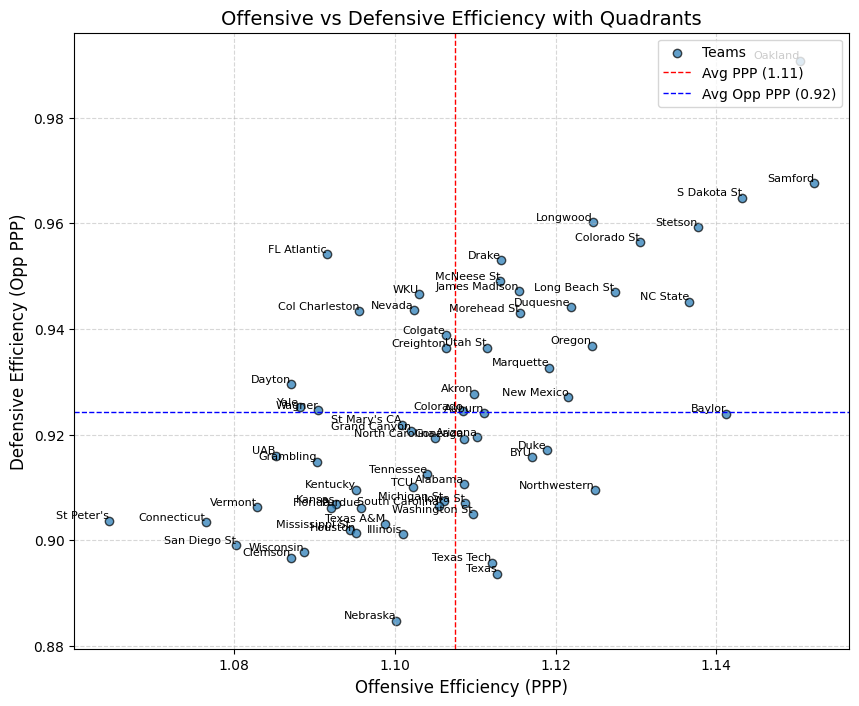

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
from google.colab import files
filtered_final_rankings = pd.read_csv('Filtered_Final_Team_Rankings.csv')

# Calculate the averages for PPP and Opp PPP
avg_ppp = filtered_final_rankings['PPP'].mean()
avg_opp_ppp = filtered_final_rankings['Opp PPP'].mean()

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(
    filtered_final_rankings['PPP'],
    filtered_final_rankings['Opp PPP'],
    alpha=0.7,
    edgecolor='k',
    label='Teams'
)

# Add vertical and horizontal lines for the averages
plt.axvline(avg_ppp, color='red', linestyle='--', linewidth=1, label=f'Avg PPP ({avg_ppp:.2f})')
plt.axhline(avg_opp_ppp, color='blue', linestyle='--', linewidth=1, label=f'Avg Opp PPP ({avg_opp_ppp:.2f})')

# Add team names as labels
for i, row in filtered_final_rankings.iterrows():
    plt.text(
        row['PPP'], row['Opp PPP'],
        row['TeamName'], fontsize=8, ha='right', va='bottom'
    )

# Add labels, title, and legend
plt.title('Offensive vs Defensive Efficiency with Quadrants', fontsize=14)
plt.xlabel('Offensive Efficiency (PPP)', fontsize=12)
plt.ylabel('Defensive Efficiency (Opp PPP)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset directly from your Colab environment
filtered_final_rankings = pd.read_csv('Filtered_Final_Team_Rankings.csv')

# Calculate Offensive Rating and Defensive Rating
filtered_final_rankings['OffRtg'] = filtered_final_rankings['PPP'] * 100
filtered_final_rankings['DefRtg'] = filtered_final_rankings['Opp PPP'] * 100

# Rank the Offensive and Defensive Ratings
filtered_final_rankings['OffRtg Rank'] = filtered_final_rankings['OffRtg'].rank(ascending=False).astype(int)
filtered_final_rankings['DefRtg Rank'] = filtered_final_rankings['DefRtg'].rank(ascending=True).astype(int)

# Save the updated dataset to a new CSV file
filtered_final_rankings.to_csv('Updated_Team_Rankings_with_Ratings.csv', index=False)

# Download the updated file to your local machine
from google.colab import files
files.download('Updated_Team_Rankings_with_Ratings.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Print the first few rows of the updated dataset
print("Head of Updated Team Rankings with Ratings:")
print(filtered_final_rankings.head())


Head of Updated Team Rankings with Ratings:
   Season Seed  TeamID      TeamName   POM   KPI   SRS   USA   TPR   STH  ...  \
0    2024  W01    1163   Connecticut   2.0   4.0   4.0   2.0   1.0   6.0  ...   
1    2024  W02    1235       Iowa St  12.0  12.0   8.0   8.0  11.0  14.0  ...   
2    2024  W03    1228      Illinois  10.0  16.0  14.0  14.0  10.0  10.0  ...   
3    2024  W04    1120        Auburn   4.0   8.0   6.0  12.0   7.0   7.0  ...   
4    2024  W05    1361  San Diego St  20.0  23.0  33.0   NaN  24.0  27.0  ...   

        FTR   Opp PPP  Opp eFG%      DRB%   Opp TO%   Opp FTR      OffRtg  \
0  0.384452  0.903454  0.424787  0.676827  0.160247  0.266736  107.648452   
1  0.352469  0.907008  0.451602  0.711473  0.182988  0.265776  110.875340   
2  0.399740  0.901132  0.444279  0.717848  0.177419  0.287015  110.097418   
3  0.431875  0.924077  0.455597  0.701394  0.187989  0.332133  111.113208   
4  0.387342  0.899064  0.447854  0.720064  0.184699  0.285415  108.024478   

      

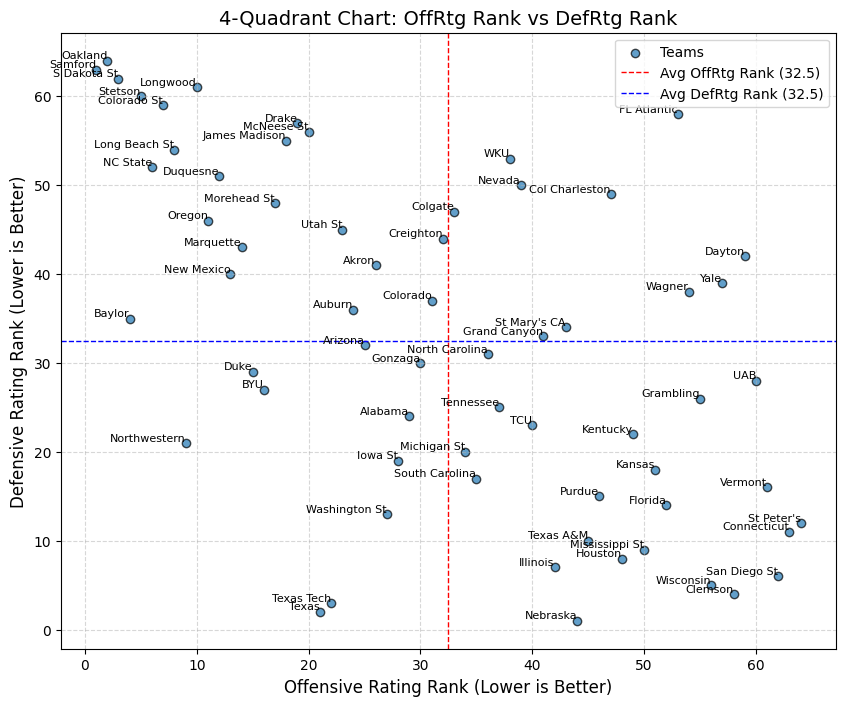

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset if not already loaded
filtered_final_rankings = pd.read_csv('Updated_Team_Rankings_with_Ratings.csv')

# Calculate the midpoints for the ranks
mid_offrtg = filtered_final_rankings['OffRtg Rank'].mean()
mid_defrtg = filtered_final_rankings['DefRtg Rank'].mean()

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(
    filtered_final_rankings['OffRtg Rank'],
    filtered_final_rankings['DefRtg Rank'],
    alpha=0.7,
    edgecolor='k',
    label='Teams'
)

# Add vertical and horizontal lines for the midpoints
plt.axvline(mid_offrtg, color='red', linestyle='--', linewidth=1, label=f'Avg OffRtg Rank ({mid_offrtg:.1f})')
plt.axhline(mid_defrtg, color='blue', linestyle='--', linewidth=1, label=f'Avg DefRtg Rank ({mid_defrtg:.1f})')

# Add team names as labels
for i, row in filtered_final_rankings.iterrows():
    plt.text(
        row['OffRtg Rank'], row['DefRtg Rank'],
        row['TeamName'], fontsize=8, ha='right', va='bottom'
    )

# Add labels, title, and legend
plt.title('4-Quadrant Chart: OffRtg Rank vs DefRtg Rank', fontsize=14)
plt.xlabel('Offensive Rating Rank (Lower is Better)', fontsize=12)
plt.ylabel('Defensive Rating Rank (Lower is Better)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


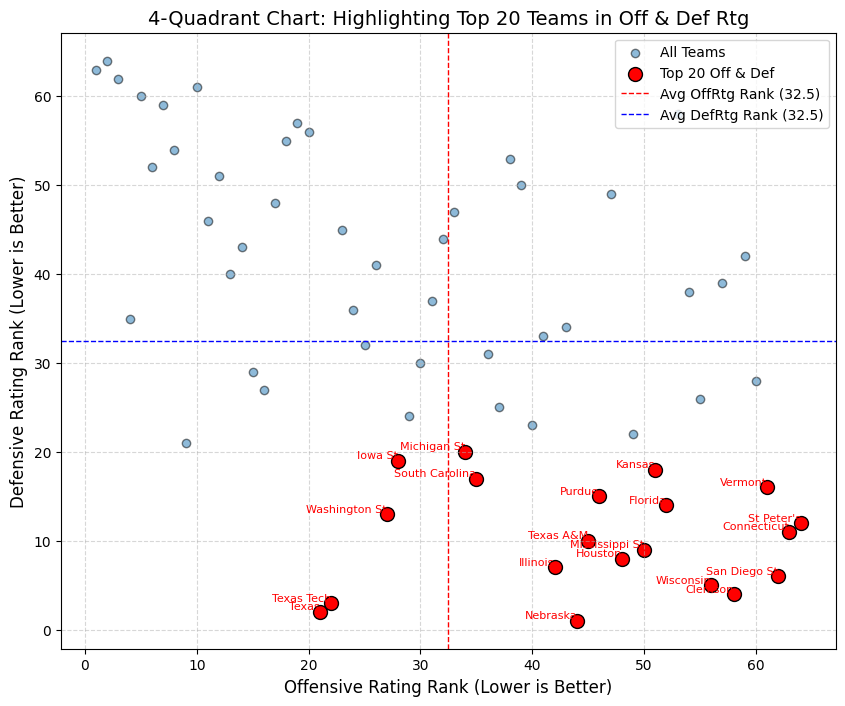

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset if not already loaded
filtered_final_rankings = pd.read_csv('Updated_Team_Rankings_with_Ratings.csv')

# Calculate the midpoints for the ranks
mid_offrtg = filtered_final_rankings['OffRtg Rank'].mean()
mid_defrtg = filtered_final_rankings['DefRtg Rank'].mean()

# Identify teams in the top 20 for both OffRtg and DefRtg ranks
top_teams = filtered_final_rankings[
    (filtered_final_rankings['OffRtg Rank'] >= 20) &
    (filtered_final_rankings['DefRtg Rank'] <= 20)
]

# Create the scatter plot
plt.figure(figsize=(10, 8))

# Plot all teams
plt.scatter(
    filtered_final_rankings['OffRtg Rank'],
    filtered_final_rankings['DefRtg Rank'],
    alpha=0.5,
    edgecolor='k',
    label='All Teams'
)

# Highlight top 20 teams
plt.scatter(
    top_teams['OffRtg Rank'],
    top_teams['DefRtg Rank'],
    color='red',
    label='Top 20 Off & Def',
    s=100,  # Larger size for emphasis
    edgecolor='black'
)

# Add vertical and horizontal lines for the midpoints
plt.axvline(mid_offrtg, color='red', linestyle='--', linewidth=1, label=f'Avg OffRtg Rank ({mid_offrtg:.1f})')
plt.axhline(mid_defrtg, color='blue', linestyle='--', linewidth=1, label=f'Avg DefRtg Rank ({mid_defrtg:.1f})')

# Add team names as labels for highlighted teams
for i, row in top_teams.iterrows():
    plt.text(
        row['OffRtg Rank'], row['DefRtg Rank'],
        row['TeamName'], fontsize=8, ha='right', va='bottom', color='red'
    )

# Add labels, title, and legend
plt.title('4-Quadrant Chart: Highlighting Top 20 Teams in Off & Def Rtg', fontsize=14)
plt.xlabel('Offensive Rating Rank (Lower is Better)', fontsize=12)
plt.ylabel('Defensive Rating Rank (Lower is Better)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


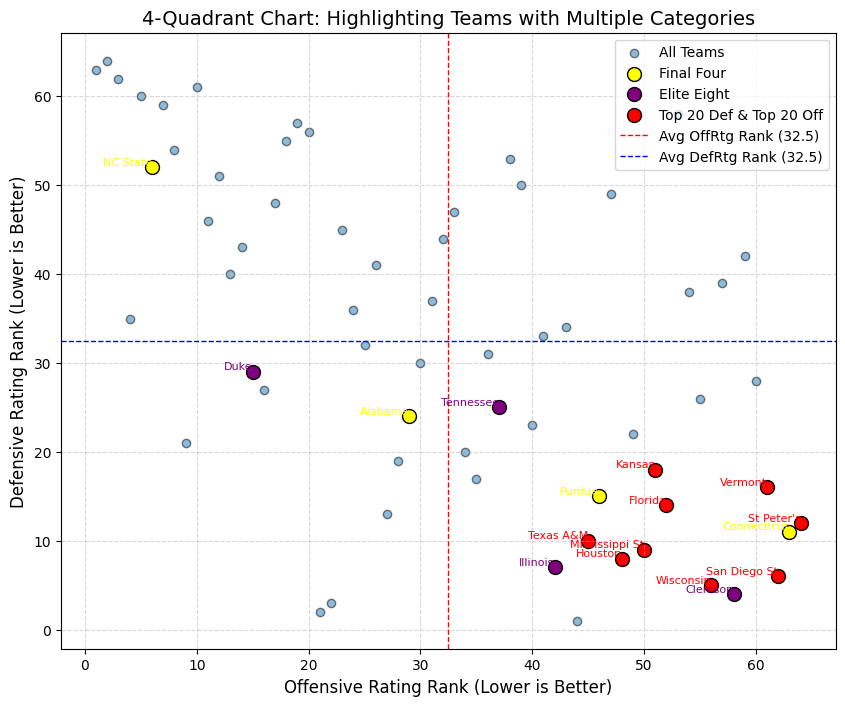

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset if not already loaded
filtered_final_rankings = pd.read_csv('Updated_Team_Rankings_with_Ratings.csv')

# Calculate the midpoints for the ranks
mid_offrtg = filtered_final_rankings['OffRtg Rank'].mean()
mid_defrtg = filtered_final_rankings['DefRtg Rank'].mean()

# Define specific teams for highlighting
yellow_teams = ['Purdue', 'Connecticut', 'Alabama', 'NC State']
purple_teams = ['Tennessee', 'Duke', 'Illinois', 'Clemson']

# Assign highlight categories
filtered_final_rankings['Highlight'] = 'None'
filtered_final_rankings.loc[filtered_final_rankings['TeamName'].isin(yellow_teams), 'Highlight'] = 'Yellow'
filtered_final_rankings.loc[filtered_final_rankings['TeamName'].isin(purple_teams), 'Highlight'] = 'Purple'
filtered_final_rankings.loc[
    (filtered_final_rankings['Highlight'] == 'None') &
    (filtered_final_rankings['DefRtg Rank'] <= 20) &
    (filtered_final_rankings['OffRtg Rank'] > (filtered_final_rankings['OffRtg Rank'].max() - 20)),
    'Highlight'
] = 'Red'

# Create the scatter plot
plt.figure(figsize=(10, 8))

# Plot all teams
plt.scatter(
    filtered_final_rankings.loc[filtered_final_rankings['Highlight'] == 'None', 'OffRtg Rank'],
    filtered_final_rankings.loc[filtered_final_rankings['Highlight'] == 'None', 'DefRtg Rank'],
    alpha=0.5, edgecolor='k', label='All Teams'
)

# Highlight yellow (Final Four) teams
plt.scatter(
    filtered_final_rankings.loc[filtered_final_rankings['Highlight'] == 'Yellow', 'OffRtg Rank'],
    filtered_final_rankings.loc[filtered_final_rankings['Highlight'] == 'Yellow', 'DefRtg Rank'],
    color='yellow', label='Final Four', s=100, edgecolor='black'
)

# Highlight purple (Elite Eight) teams
plt.scatter(
    filtered_final_rankings.loc[filtered_final_rankings['Highlight'] == 'Purple', 'OffRtg Rank'],
    filtered_final_rankings.loc[filtered_final_rankings['Highlight'] == 'Purple', 'DefRtg Rank'],
    color='purple', label='Elite Eight', s=100, edgecolor='black'
)

# Highlight red (Top 20 Def & Bottom 20 Off)
plt.scatter(
    filtered_final_rankings.loc[filtered_final_rankings['Highlight'] == 'Red', 'OffRtg Rank'],
    filtered_final_rankings.loc[filtered_final_rankings['Highlight'] == 'Red', 'DefRtg Rank'],
    color='red', label='Top 20 Def & Top 20 Off', s=100, edgecolor='black'
)

# Add vertical and horizontal lines for the midpoints
plt.axvline(mid_offrtg, color='red', linestyle='--', linewidth=1, label=f'Avg OffRtg Rank ({mid_offrtg:.1f})')
plt.axhline(mid_defrtg, color='blue', linestyle='--', linewidth=1, label=f'Avg DefRtg Rank ({mid_defrtg:.1f})')

# Add team labels for yellow, purple, and red teams
for i, row in filtered_final_rankings[filtered_final_rankings['Highlight'].isin(['Yellow', 'Purple', 'Red'])].iterrows():
    plt.text(
        row['OffRtg Rank'], row['DefRtg Rank'],
        row['TeamName'], fontsize=8, ha='right', va='bottom',
        color='yellow' if row['Highlight'] == 'Yellow' else (
            'purple' if row['Highlight'] == 'Purple' else 'red'
        )
    )

# Add labels, title, and legend
plt.title('4-Quadrant Chart: Highlighting Teams with Multiple Categories', fontsize=14)
plt.xlabel('Offensive Rating Rank (Lower is Better)', fontsize=12)
plt.ylabel('Defensive Rating Rank (Lower is Better)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


Create a graph that looks at this but for rebounds and shooting percentage, and assist to turnover ration

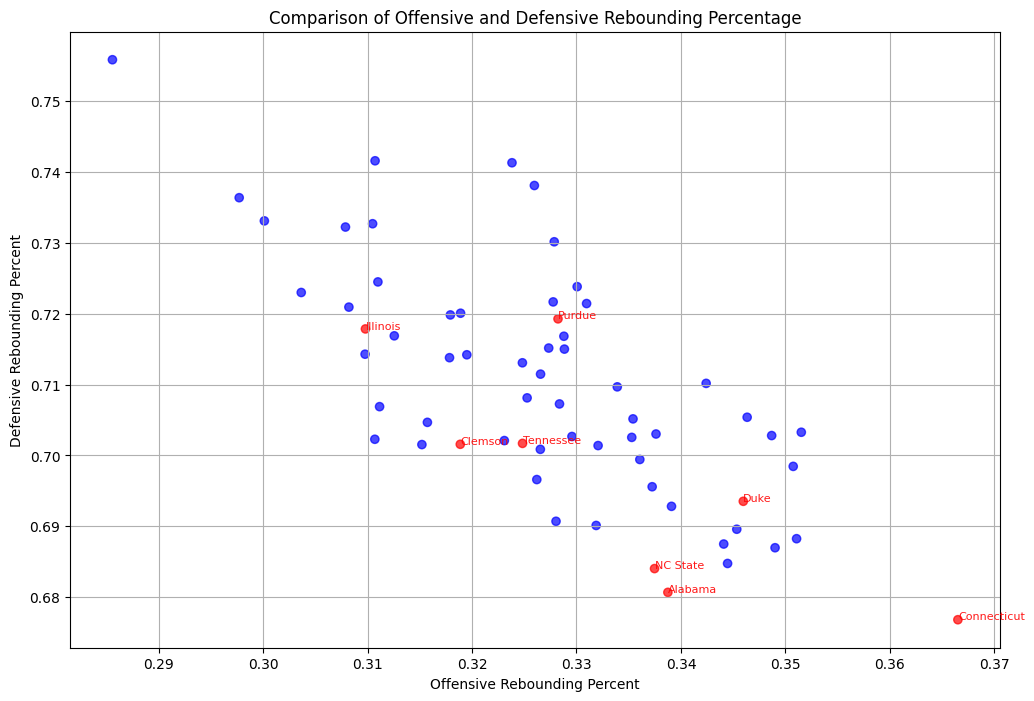

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Updated_Team_Rankings_with_Ratings.csv'
data = pd.read_csv(file_path)

# Filter necessary columns
team_names = data['TeamName']
off_efg = data['ORB%']
def_efg = data['DRB%']

# Teams to highlight
highlight_teams = [
    "Connecticut", "Illinois", "Clemson", "Alabama",
    "Duke", "NC State", "Purdue", "Tennessee"
]

# Determine colors
colors = ['red' if team in highlight_teams else 'blue' for team in team_names]

# Plot the data
plt.figure(figsize=(12, 8))
plt.scatter(off_efg, def_efg, c=colors, alpha=0.7)
plt.xlabel('Offensive Rebounding Percent')
plt.ylabel('Defensive Rebounding Percent')
plt.title('Comparison of Offensive and Defensive Rebounding Percentage')
plt.grid(True)

# Add team names as annotations (optional)
for i, team in enumerate(team_names):
    if team in highlight_teams:
        plt.annotate(team, (off_efg[i], def_efg[i]), fontsize=8, alpha=0.9, color='red')

plt.show()


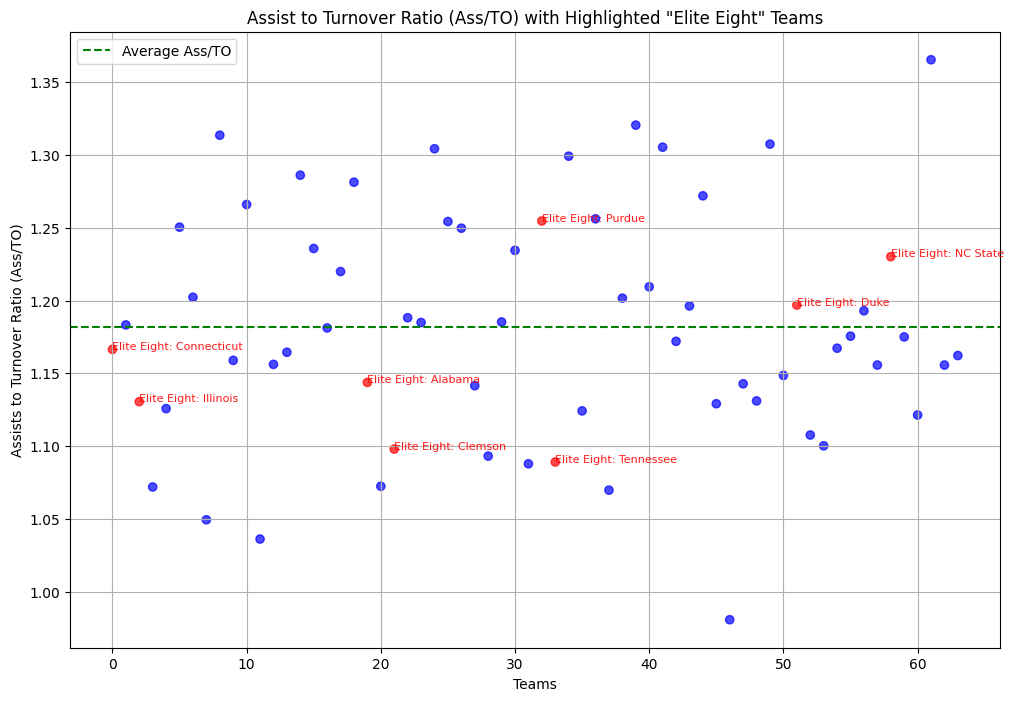

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Updated_Team_Rankings_with_Ratings.csv'
data = pd.read_csv(file_path)

# Filter necessary columns
team_names = data['TeamName']
ass_to = data['AST/TO']

# Teams to highlight
elite_eight_teams = [
    "Connecticut", "Illinois", "Clemson", "Alabama",
    "Duke", "NC State", "Purdue", "Tennessee"
]

# Determine colors and labels
colors = ['red' if team in elite_eight_teams else 'blue' for team in team_names]

# Plot the data
plt.figure(figsize=(12, 8))
plt.scatter(range(len(ass_to)), ass_to, c=colors, alpha=0.7)
plt.axhline(y=ass_to.mean(), color='green', linestyle='--', label='Average Ass/TO')
plt.xlabel('Teams')
plt.ylabel('Assists to Turnover Ratio (Ass/TO)')
plt.title('Assist to Turnover Ratio (Ass/TO) with Highlighted "Elite Eight" Teams')
plt.grid(True)

# Add labels for highlighted teams
for i, team in enumerate(team_names):
    if team in elite_eight_teams:
        plt.annotate("Elite Eight: " + team, (i, ass_to.iloc[i]), fontsize=8, color='red', alpha=0.9)

plt.legend()
plt.show()


In [ ]:
# Importing necessary libraries
import pandas as pd

# File paths (adjust these if necessary)
file_path_original = 'Updated_Team_Rankings_with_Ratings.csv'
file_path_new = 'Cleaned_Overall_Defensive_Averages.csv'

# Load the datasets
original_data = pd.read_csv(file_path_original)
new_data = pd.read_csv(file_path_new)

# Merge the datasets using TeamID and extract relevant columns
merged_data = pd.merge(original_data, new_data[['TeamID', 'LScore']], on='TeamID', how='left')

# Rename 'LScore' to 'PPG' for clarity
merged_data.rename(columns={'LScore': 'PPG'}, inplace=True)

# Save the merged data to file for further use
merged_data.to_csv('Updated_Team_Rankings_with_Ratings.csv', index=False)

# Display the first few rows of the merged dataset
merged_data.head()


,Season,Seed,TeamID,TeamName,POM,KPI,SRS,USA,TPR,STH,...,Opp PPP,Opp eFG%,DRB%,Opp TO%,Opp FTR,OffRtg,DefRtg,OffRtg Rank,DefRtg Rank,PPG
0,2024,W01,1163,Connecticut,2.0,4.0,4.0,2.0,1.0,6.0,...,0.903454,0.424787,0.676827,0.160247,0.266736,107.648452,90.345395,63,11,62.367647
1,2024,W02,1235,Iowa St,12.0,12.0,8.0,8.0,11.0,14.0,...,0.907008,0.451602,0.711473,0.182988,0.265776,110.875340,90.700790,28,19,63.466837
2,2024,W03,1228,Illinois,10.0,16.0,14.0,14.0,10.0,10.0,...,0.901132,0.444279,0.717848,0.177419,0.287015,110.097418,90.113234,42,7,60.880000
3,2024,W04,1120,Auburn,4.0,8.0,6.0,12.0,7.0,7.0,...,0.924077,0.455597,0.701394,0.187989,0.332133,111.113208,92.407742,24,36,65.318302
4,2024,W05,1361,San Diego St,20.0,23.0,33.0,NaN,24.0,27.0,...,0.899064,0.447854,0.720064,0.184699,0.285415,108.024478,89.906427,62,6,59.836170


New bracket creation 12/7 7:15pm

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'Updated_Team_Rankings_with_Ratings.csv'  # Ensure the file is uploaded to Colab
data = pd.read_csv(file_path)

# Define the patterns for "Round of 64"
pattern_w = ["R1W1", "R1W2", "R1W3", "R1W4", "R1W5", "R1W6", "R1W7", "R1W8",
             "R1W8", "R1W7", "R1W6", "R1W5", "R1W4", "R1W3", "R1W2", "R1W1"]
pattern_x = [p.replace("W", "X") for p in pattern_w]
pattern_y = [p.replace("W", "Y") for p in pattern_w]
pattern_z = [p.replace("W", "Z") for p in pattern_w]

# Combine all the patterns into a single column "Round of 64"
combined_rounds = pattern_w + pattern_x + pattern_y + pattern_z

# Add the new column to the dataset
data['Round of 64'] = combined_rounds * (len(data) // len(combined_rounds)) + combined_rounds[:len(data) % len(combined_rounds)]

# Save the updated dataset
output_path = 'Updated_Team_Rankings_with_Round_of_64_Combined.csv'
data.to_csv(output_path, index=False)

# Display the updated dataset
print("Updated Dataset:")
print(data.head())

# Provide download link for the updated file
from google.colab import files
files.download(output_path)


Updated Dataset:
   Season Seed  TeamID      TeamName   POM   KPI   SRS   USA   TPR   STH  ...  \
0    2024  W01    1163   Connecticut   2.0   4.0   4.0   2.0   1.0   6.0  ...   
1    2024  W02    1235       Iowa St  12.0  12.0   8.0   8.0  11.0  14.0  ...   
2    2024  W03    1228      Illinois  10.0  16.0  14.0  14.0  10.0  10.0  ...   
3    2024  W04    1120        Auburn   4.0   8.0   6.0  12.0   7.0   7.0  ...   
4    2024  W05    1361  San Diego St  20.0  23.0  33.0   NaN  24.0  27.0  ...   

   Opp eFG%      DRB%   Opp TO%   Opp FTR      OffRtg     DefRtg  OffRtg Rank  \
0  0.424787  0.676827  0.160247  0.266736  107.648452  90.345395           63   
1  0.451602  0.711473  0.182988  0.265776  110.875340  90.700790           28   
2  0.444279  0.717848  0.177419  0.287015  110.097418  90.113234           42   
3  0.455597  0.701394  0.187989  0.332133  111.113208  92.407742           24   
4  0.447854  0.720064  0.184699  0.285415  108.024478  89.906427           62   

   DefRtg

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'Updated_Team_Rankings_with_Round_of_64_Combined.csv'  # Ensure the file is uploaded to Colab
data = pd.read_csv(file_path)

# Define the patterns for "Round of 32"
pattern_round_32_w = ["R2W1", "R2W2", "R2W3", "R2W4", "R2W4", "R2W3", "R2W2", "R2W1",
                      "R2W1", "R2W2", "R2W3", "R2W4", "R2W4", "R2W3", "R2W2", "R2W1"]
pattern_round_32_x = [p.replace("W", "X") for p in pattern_round_32_w]
pattern_round_32_y = [p.replace("W", "Y") for p in pattern_round_32_w]
pattern_round_32_z = [p.replace("W", "Z") for p in pattern_round_32_w]

# Combine all the patterns into a single column "Round of 32"
combined_round_32 = (pattern_round_32_w + pattern_round_32_x +
                     pattern_round_32_y + pattern_round_32_z)

# Add the new column to the dataset
data['Round of 32'] = (combined_round_32 * (len(data) // len(combined_round_32)) +
                       combined_round_32[:len(data) % len(combined_round_32)])

# Save the updated dataset
output_path = 'Updated_Team_Rankings_with_Rounds_of_64_and_32.csv'
data.to_csv(output_path, index=False)

# Display the updated dataset
print("Updated Dataset with Round of 32:")
print(data.head())

# Provide download link for the updated file
from google.colab import files
files.download(output_path)


Updated Dataset with Round of 32:
   Season Seed  TeamID      TeamName   POM   KPI   SRS   USA   TPR   STH  ...  \
0    2024  W01    1163   Connecticut   2.0   4.0   4.0   2.0   1.0   6.0  ...   
1    2024  W02    1235       Iowa St  12.0  12.0   8.0   8.0  11.0  14.0  ...   
2    2024  W03    1228      Illinois  10.0  16.0  14.0  14.0  10.0  10.0  ...   
3    2024  W04    1120        Auburn   4.0   8.0   6.0  12.0   7.0   7.0  ...   
4    2024  W05    1361  San Diego St  20.0  23.0  33.0   NaN  24.0  27.0  ...   

       DRB%   Opp TO%   Opp FTR      OffRtg     DefRtg  OffRtg Rank  \
0  0.676827  0.160247  0.266736  107.648452  90.345395           63   
1  0.711473  0.182988  0.265776  110.875340  90.700790           28   
2  0.717848  0.177419  0.287015  110.097418  90.113234           42   
3  0.701394  0.187989  0.332133  111.113208  92.407742           24   
4  0.720064  0.184699  0.285415  108.024478  89.906427           62   

   DefRtg Rank        PPG  Round of 64  Round of 32 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'Updated_Team_Rankings_with_Rounds_of_64_and_32.csv'  # Ensure the file is uploaded to Colab
data = pd.read_csv(file_path)

# Define the patterns for "Sweet 16"
pattern_sweet_16_w = ["R3W1", "R3W2", "R3W2", "R3W1", "R3W1", "R3W2", "R3W2", "R3W1",
                      "R3W1", "R3W2", "R3W2", "R3W1", "R3W1", "R3W2", "R3W2", "R3W1"]
pattern_sweet_16_x = [p.replace("W", "X") for p in pattern_sweet_16_w]
pattern_sweet_16_y = [p.replace("W", "Y") for p in pattern_sweet_16_w]
pattern_sweet_16_z = [p.replace("W", "Z") for p in pattern_sweet_16_w]

# Combine all the patterns into a single column "Sweet 16"
combined_sweet_16 = (pattern_sweet_16_w + pattern_sweet_16_x +
                     pattern_sweet_16_y + pattern_sweet_16_z)

# Add the new column to the dataset
data['Sweet 16'] = (combined_sweet_16 * (len(data) // len(combined_sweet_16)) +
                    combined_sweet_16[:len(data) % len(combined_sweet_16)])

# Save the updated dataset
output_path = 'Updated_Team_Rankings_with_Sweet_16.csv'
data.to_csv(output_path, index=False)

# Display the updated dataset
print("Updated Dataset with Sweet 16:")
print(data.head())

# Provide download link for the updated file
from google.colab import files
files.download(output_path)


Updated Dataset with Sweet 16:
   Season Seed  TeamID      TeamName   POM   KPI   SRS   USA   TPR   STH  ...  \
0    2024  W01    1163   Connecticut   2.0   4.0   4.0   2.0   1.0   6.0  ...   
1    2024  W02    1235       Iowa St  12.0  12.0   8.0   8.0  11.0  14.0  ...   
2    2024  W03    1228      Illinois  10.0  16.0  14.0  14.0  10.0  10.0  ...   
3    2024  W04    1120        Auburn   4.0   8.0   6.0  12.0   7.0   7.0  ...   
4    2024  W05    1361  San Diego St  20.0  23.0  33.0   NaN  24.0  27.0  ...   

    Opp TO%   Opp FTR      OffRtg     DefRtg  OffRtg Rank  DefRtg Rank  \
0  0.160247  0.266736  107.648452  90.345395           63           11   
1  0.182988  0.265776  110.875340  90.700790           28           19   
2  0.177419  0.287015  110.097418  90.113234           42            7   
3  0.187989  0.332133  111.113208  92.407742           24           36   
4  0.184699  0.285415  108.024478  89.906427           62            6   

         PPG  Round of 64  Round of 3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'Updated_Team_Rankings_with_Sweet_16.csv'  # Ensure the file is uploaded to Colab
data = pd.read_csv(file_path)

# Define the patterns for "Elite Eight"
pattern_elite_eight_w = [
    "R4W1", "R4W1", "R4W1", "R4W1",
    "R4W1", "R4W1", "R4W1", "R4W1",
    "R4W1", "R4W1", "R4W1", "R4W1",
    "R4W1", "R4W1", "R4W1", "R4W1"
]
pattern_elite_eight_x = [p.replace("W", "X") for p in pattern_elite_eight_w]
pattern_elite_eight_y = [p.replace("W", "Y") for p in pattern_elite_eight_w]
pattern_elite_eight_z = [p.replace("W", "Z") for p in pattern_elite_eight_w]

# Combine all the patterns into a single column "Elite Eight"
combined_elite_eight = (pattern_elite_eight_w + pattern_elite_eight_x +
                        pattern_elite_eight_y + pattern_elite_eight_z)

# Add the new column to the dataset
data['Elite Eight'] = (combined_elite_eight * (len(data) // len(combined_elite_eight)) +
                       combined_elite_eight[:len(data) % len(combined_elite_eight)])

# Save the updated dataset
output_path = 'Updated_Team_Rankings_with_Elite_Eight.csv'
data.to_csv(output_path, index=False)

# Display the updated dataset
print("Updated Dataset with Elite Eight:")
print(data.head())

# Provide download link for the updated file
from google.colab import files
files.download(output_path)


Updated Dataset with Elite Eight:
   Season Seed  TeamID      TeamName   POM   KPI   SRS   USA   TPR   STH  ...  \
0    2024  W01    1163   Connecticut   2.0   4.0   4.0   2.0   1.0   6.0  ...   
1    2024  W02    1235       Iowa St  12.0  12.0   8.0   8.0  11.0  14.0  ...   
2    2024  W03    1228      Illinois  10.0  16.0  14.0  14.0  10.0  10.0  ...   
3    2024  W04    1120        Auburn   4.0   8.0   6.0  12.0   7.0   7.0  ...   
4    2024  W05    1361  San Diego St  20.0  23.0  33.0   NaN  24.0  27.0  ...   

    Opp FTR      OffRtg     DefRtg  OffRtg Rank  DefRtg Rank        PPG  \
0  0.266736  107.648452  90.345395           63           11  62.367647   
1  0.265776  110.875340  90.700790           28           19  63.466837   
2  0.287015  110.097418  90.113234           42            7  60.880000   
3  0.332133  111.113208  92.407742           24           36  65.318302   
4  0.285415  108.024478  89.906427           62            6  59.836170   

   Round of 64  Round of 32 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'Updated_Team_Rankings_with_Elite_Eight.csv'  # Ensure the file is uploaded to Colab
data = pd.read_csv(file_path)

# Add the "Final Four" column based on conditions in the "Elite Eight" column
data['Final Four'] = data['Elite Eight'].apply(
    lambda x: "R5WX" if x in ["R4W1", "R4X1"] else ("R5YZ" if x in ["R4Y1", "R4Z1"] else None)
)

# Save the updated dataset
output_path = 'Updated_Team_Rankings_with_Final_Four.csv'
data.to_csv(output_path, index=False)

# Display the updated dataset
print("Updated Dataset with Final Four:")
print(data[['Elite Eight', 'Final Four']].head())

# Provide download link for the updated file
from google.colab import files
files.download(output_path)


Updated Dataset with Final Four:
  Elite Eight Final Four
0        R4W1       R5WX
1        R4W1       R5WX
2        R4W1       R5WX
3        R4W1       R5WX
4        R4W1       R5WX


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'Updated_Team_Rankings_with_Final_Four.csv'  # Ensure the file is uploaded to Colab
data = pd.read_csv(file_path)

# Add the "Championship" column based on conditions in the "Final Four" column
data['Championship'] = data['Final Four'].apply(
    lambda x: "R6CH" if x in ["R5WX", "R5YZ"] else None
)

# Save the updated dataset
output_path = 'Updated_Team_Rankings_with_Championship.csv'
data.to_csv(output_path, index=False)

# Display the updated dataset
print("Updated Dataset with Championship:")
print(data[['Final Four', 'Championship']].head())

# Provide download link for the updated file
from google.colab import files
files.download(output_path)


Updated Dataset with Championship:
  Final Four Championship
0       R5WX         R6CH
1       R5WX         R6CH
2       R5WX         R6CH
3       R5WX         R6CH
4       R5WX         R6CH


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test Run

In [ ]:
# Function to simulate each round
def simulate_round(data, round_column, next_round_column, criteria_column):
    winners = []
    for value in data[round_column].unique():
        # Get the teams sharing the same round value
        round_teams = data[data[round_column] == value]

        if len(round_teams) == 2:  # Matchup requires exactly two teams
            # Compare the criteria (e.g., POM score) to determine the winner
            team_1 = round_teams.iloc[0]
            team_2 = round_teams.iloc[1]
            winner = team_1 if team_1[criteria_column] < team_2[criteria_column] else team_2
            winners.append(winner)

    # Convert the list of winners back to a DataFrame
    winners_df = pd.DataFrame(winners)

    # Reset the next round paths for the losers
    data[next_round_column] = data.apply(
        lambda row: row[next_round_column] if row[round_column] in winners_df[round_column].values else None, axis=1
    )
    return winners_df

# Simulate the tournament
rounds = ['Round of 64', 'Round of 32', 'Sweet 16', 'Elite Eight', 'Final Four', 'Championship']
data['Winner Path'] = None  # Initialize a column to track the winning path

for i in range(len(rounds) - 1):
    data = simulate_round(data, rounds[i], rounds[i + 1], criteria_column='POM')

# Save the final results
output_path = 'Tournament_Results.csv'
data.to_csv(output_path, index=False)

# Display the final results
print("Tournament Simulation Results:")
print(data[['TeamID', 'TeamName', 'Winner Path', 'Championship']].head())

# Provide download link for the final results
from google.colab import files
files.download(output_path)


Tournament Simulation Results:
    TeamID     TeamName Winner Path Championship
0     1163  Connecticut        None         R6CH
48    1222      Houston        None         R6CH


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It works

Formula rankings
1. KPI, POM,and AVG rank
2. AST/TO and OppTO%
3. PPG
4. eFG% and Opp eFG%
5. PPP, OPPP, OffTtg, DefRTG
6.  ORB%
7. DRB%
8. FTR, OPPFTR
Add a random simulation value where an upset can happen


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'Updated_Team_Rankings_with_Championship.csv'  # Ensure the file is uploaded to Colab
data = pd.read_csv(file_path)

# Define weights for each stat
weights = {
    'KPI': -0.15,
    'POM': -0.15,
    'AverageRank': -0.15,  # Adjust column names as needed
    'AST/TO': 0.15,
    'Opp TO%': -0.15,
    'PPG': 0.1,
    'eFG%': 0.08,
    'Opp eFG%': -0.08,
    'PPP': 0.06,
    'Opp PPP': -0.06,
    'OffRtg': 0.05,
    'DefRtg': 0.05,
    'ORB%': 0.04,
    'DRB%': 0.03,
    'FTR': 0.02,
    'Opp FTR': -0.02
}

# Calculate the weighted score
def calculate_weighted_score(row):
    score = 0
    for stat, weight in weights.items():
        score += weight * row[stat]

    # Add a random upset factor (normalized)
    random_factor = np.random.uniform(0, 0.2)  # Adjust randomness magnitude
    upset_chance = np.random.choice([1, -1], p=[0.85, 0.15])  # 15% chance of upset
    score += random_factor * upset_chance

    return score

# Apply the formula to calculate scores for all teams
data['Weighted_Score'] = data.apply(calculate_weighted_score, axis=1)

# Function to simulate a round using the weighted score
def simulate_round_with_upsets(data, round_column, next_round_column):
    winners = []
    for value in data[round_column].unique():
        # Get the teams sharing the same round value
        round_teams = data[data[round_column] == value]

        if len(round_teams) == 2:  # Matchup requires exactly two teams
            # Compare the weighted scores to determine the winner
            team_1 = round_teams.iloc[0]
            team_2 = round_teams.iloc[1]
            winner = team_1 if team_1['Weighted_Score'] > team_2['Weighted_Score'] else team_2
            winners.append(winner)

    # Convert the list of winners back to a DataFrame
    winners_df = pd.DataFrame(winners)

    # Reset the next round paths for the losers
    data[next_round_column] = data.apply(
        lambda row: row[next_round_column] if row[round_column] in winners_df[round_column].values else None, axis=1
    )
    return winners_df

# Simulate the tournament
rounds = ['Round of 64', 'Round of 32', 'Sweet 16', 'Elite Eight', 'Final Four', 'Championship']

for i in range(len(rounds) - 1):
    data = simulate_round_with_upsets(data, rounds[i], rounds[i + 1])

# Save the final results
output_path = 'Tournament_Results_With_Weighted_Formula_and_Upsets.csv'
data.to_csv(output_path, index=False)

# Display the final results
print("Tournament Simulation Results with Weighted Formula and Upsets:")
print(data[['TeamID', 'TeamName', 'Weighted_Score', 'Championship']].head())

# Provide download link for the final results
from google.colab import files
files.download(output_path)


Tournament Simulation Results with Weighted Formula and Upsets:
    TeamID     TeamName  Weighted_Score Championship
0     1163  Connecticut       14.958697         R6CH
48    1222      Houston       15.656322         R6CH


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Upload your dataset to Colab and provide the file path
file_path = 'Updated_Team_Rankings_with_Championship.csv'  # Ensure the file is uploaded to Colab
data = pd.read_csv(file_path)

# Define weights for each stat
weights = {
    'KPI': -0.10,
    'POM': -0.10,
    'AverageRank': -0.10,  # Adjust column names as needed
    'AST/TO': 0.10,
    'Opp TO%': -0.10,
    'PPG': 0.1,
    'eFG%': 0.08,
    'Opp eFG%': -0.08,
    'PPP': 0.06,
    'Opp PPP': -0.06,
    'OffRtg': 0.05,
    'DefRtg': 0.05,
    'ORB%': 0.04,
    'DRB%': 0.03,
    'FTR': 0.02,
    'Opp FTR': -0.02
}

# Function to calculate weighted scores
def calculate_score(row):
    score = 0
    for stat, weight in weights.items():
        if stat in row:
            score += weight * row[stat]
    random_factor = np.random.uniform(0, 0.2)
    upset = np.random.choice([1, -1], p=[0.85, 0.15])  # 15% chance of upset
    score += random_factor * upset
    return score

# Apply the score calculation to the dataset
data['Weighted_Score'] = data.apply(calculate_score, axis=1)

# Function to simulate a single round
def simulate_round(data, current_round_col, next_round_col):
    winners = []
    unique_matchups = data[current_round_col].dropna().unique()

    for matchup in unique_matchups:
        teams = data[data[current_round_col] == matchup]
        if len(teams) == 2:
            team_1 = teams.iloc[0]
            team_2 = teams.iloc[1]
            winner = team_1 if team_1['Weighted_Score'] > team_2['Weighted_Score'] else team_2
            winners.append(winner)

    winners_df = pd.DataFrame(winners)
    if next_round_col:
        data[next_round_col] = data.apply(
            lambda row: row[next_round_col] if row['TeamID'] in winners_df['TeamID'].values else None,
            axis=1,
        )
    return winners_df

# Simulate each round one at a time and save results
rounds = [
    ('Round of 64', 'Round of 32'),
    ('Round of 32', 'Sweet 16'),
    ('Sweet 16', 'Elite Eight'),
    ('Elite Eight', 'Final Four'),
    ('Final Four', 'Championship'),
]

for current_round, next_round in rounds:
    print(f"Simulating {current_round}...")
    results = simulate_round(data, current_round, next_round)
    file_name = f'{current_round.replace(" ", "_")}_Results.csv'
    results.to_csv(file_name, index=False)
    print(f"{current_round} Results:")
    print(results[['TeamID', 'TeamName', 'Weighted_Score']].head())

    # Provide download link
    from google.colab import files
    files.download(file_name)

# Simulate the final round
championship_results = simulate_round(data, 'Championship', None)
championship_results.to_csv('Championship_Results.csv', index=False)
print("Championship Results:")
print(championship_results[['TeamID', 'TeamName', 'Weighted_Score']].head())
files.download('Championship_Results.csv')


Simulating Round of 64...
Round of 64 Results:
   TeamID      TeamName  Weighted_Score
0    1163   Connecticut       15.239929
1    1235       Iowa St       13.215836
2    1228      Illinois       12.329609
3    1120        Auburn       14.823397
4    1361  San Diego St        9.312954


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Simulating Round of 32...
Round of 32 Results:
    TeamID        TeamName  Weighted_Score
0     1163     Connecticut       15.239929
1     1235         Iowa St       13.215836
2     1228        Illinois       12.329609
3     1120          Auburn       14.823397
16    1314  North Carolina       15.240022


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Simulating Sweet 16...
Sweet 16 Results:
    TeamID        TeamName  Weighted_Score
0     1163     Connecticut       15.239929
1     1235         Iowa St       13.215836
16    1314  North Carolina       15.240022
17    1112         Arizona       15.009031
32    1345          Purdue       15.763694


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Simulating Elite Eight...
Elite Eight Results:
    TeamID        TeamName  Weighted_Score
0     1163     Connecticut       15.239929
16    1314  North Carolina       15.240022
32    1345          Purdue       15.763694
48    1222         Houston       15.985941


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Simulating Final Four...
Final Four Results:
    TeamID        TeamName  Weighted_Score
16    1314  North Carolina       15.240022
48    1222         Houston       15.985941


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Championship Results:
    TeamID TeamName  Weighted_Score
48    1222  Houston       15.985941


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def simulate_round_fixed_v2(data, current_round_col, next_round_col):
    winners = []
    unique_matchups = data[current_round_col].dropna().unique()

    for matchup in unique_matchups:
        teams = data[data[current_round_col] == matchup]
        if len(teams) == 2:
            team_1 = teams.iloc[0]
            team_2 = teams.iloc[1]
            winner = team_1 if team_1['Weighted_Score'] > team_2['Weighted_Score'] else team_2
            winners.append(winner)

    winners_df = pd.DataFrame(winners)
    if next_round_col:
        # Update next round column directly in the main dataset based on winners
        data[next_round_col] = data.apply(
            lambda row: row[next_round_col] if row['TeamID'] in winners_df['TeamID'].values else None,
            axis=1,
        )
    return winners_df


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Upload your dataset to Colab and provide the file path
file_path = 'Updated_Team_Rankings_with_Championship.csv'  # Ensure the file is uploaded to Colab
data = pd.read_csv(file_path)

# Define weights for each stat
weights = {
    'KPI': -0.15,
    'POM': -0.15,
    'AverageRank': -0.15,  # Adjust column names as needed
    'AST/TO': 0.13,
    'Opp TO%': -0.13,
    'PPG': 0.13,
    'eFG%': 0.08,
    'Opp eFG%': -0.08,
    'PPP': 0.06,
    'Opp PPP': -0.06,
    'OffRtg': 0.05,
    'DefRtg': 0.05,
    'ORB%': 0.04,
    'DRB%': 0.03,
    'FTR': 0.02,
    'Opp FTR': -0.02
}

# Function to calculate weighted scores
def calculate_score(row):
    score = 0
    for stat, weight in weights.items():
        if stat in row:
            score += weight * row[stat]
    random_factor = np.random.uniform(0, 0.2)
    upset = np.random.choice([1, -1], p=[0.7, 0.3])  # 30% chance of upset
    score += random_factor * upset
    return score

# Apply the score calculation to the dataset
data['Weighted_Score'] = data.apply(calculate_score, axis=1)

# Function to predict game scores based on weighted scores
def predict_game_scores(team_1_score, team_2_score):
    base_score = 65  # Base score for a team
    variability = np.random.uniform(-5, 5)  # Random variability
    score_1 = base_score + team_1_score + variability
    score_2 = base_score + team_2_score - variability
    return round(score_1), round(score_2)

# Function to simulate a single round
def simulate_round(data, current_round_col, next_round_col):
    winners = []
    game_scores = []
    unique_matchups = data[current_round_col].dropna().unique()

    for matchup in unique_matchups:
        teams = data[data[current_round_col] == matchup]
        if len(teams) == 2:
            team_1 = teams.iloc[0]
            team_2 = teams.iloc[1]
            score_1, score_2 = predict_game_scores(
                team_1['Weighted_Score'], team_2['Weighted_Score']
            )
            game_scores.append((team_1['TeamName'], team_2['TeamName'], score_1, score_2))
            winner = team_1 if score_1 > score_2 else team_2
            winners.append(winner)

    winners_df = pd.DataFrame(winners)
    if next_round_col:
        data[next_round_col] = data.apply(
            lambda row: row[next_round_col] if row['TeamID'] in winners_df['TeamID'].values else None,
            axis=1,
        )

    # Create a DataFrame for game scores
    scores_df = pd.DataFrame(game_scores, columns=['Team1', 'Team2', 'Score1', 'Score2'])
    return winners_df, scores_df

# Simulate each round one at a time and save results
rounds = [
    ('Round of 64', 'Round of 32'),
    ('Round of 32', 'Sweet 16'),
    ('Sweet 16', 'Elite Eight'),
    ('Elite Eight', 'Final Four'),
    ('Final Four', 'Championship'),
]

for current_round, next_round in rounds:
    print(f"Simulating {current_round}...")
    results, scores = simulate_round(data, current_round, next_round)

    # Save the results and scores to CSV
    results_file_name = f'{current_round.replace(" ", "_")}_Results.csv'
    scores_file_name = f'{current_round.replace(" ", "_")}_Scores.csv'
    results.to_csv(results_file_name, index=False)
    scores.to_csv(scores_file_name, index=False)

    print(f"{current_round} Results:")
    print(results[['TeamID', 'TeamName', 'Weighted_Score']].head())
    print(f"{current_round} Scores:")
    print(scores.head())

    # Provide download links for results and scores
    from google.colab import files
    files.download(results_file_name)
    files.download(scores_file_name)

# Simulate the final round
championship_results, championship_scores = simulate_round(data, 'Championship', None)
championship_results.to_csv('Championship_Results.csv', index=False)
championship_scores.to_csv('Championship_Scores.csv', index=False)

print("Championship Results:")
print(championship_results[['TeamID', 'TeamName', 'Weighted_Score']].head())
print("Championship Scores:")
print(championship_scores.head())

# Download championship results and scores
files.download('Championship_Results.csv')
files.download('Championship_Scores.csv')


Simulating Round of 64...
Round of 64 Results:
   TeamID      TeamName  Weighted_Score
0    1163   Connecticut       16.993291
1    1235       Iowa St       13.373652
2    1228      Illinois       12.131695
3    1120        Auburn       15.870397
4    1361  San Diego St        8.018584
Round of 64 Scores:
          Team1        Team2  Score1  Score2
0   Connecticut      Stetson      83      -5
1       Iowa St  S Dakota St      83       7
2      Illinois  Morehead St      80      26
3        Auburn         Yale      78      46
4  San Diego St          UAB      76      37


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Simulating Round of 32...
Round of 32 Results:
    TeamID        TeamName  Weighted_Score
0     1163     Connecticut       16.993291
1     1235         Iowa St       13.373652
2     1228        Illinois       12.131695
3     1120          Auburn       15.870397
16    1314  North Carolina       16.153772
Round of 32 Scores:
            Team1         Team2  Score1  Score2
0     Connecticut   FL Atlantic      85      67
1         Iowa St         Drake      83      64
2        Illinois           BYU      76      75
3          Auburn  San Diego St      80      74
4  North Carolina   Michigan St      81      69


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Simulating Sweet 16...
Sweet 16 Results:
    TeamID  TeamName  Weighted_Score
3     1120    Auburn       15.870397
2     1228  Illinois       12.131695
19    1104   Alabama       14.139039
17    1112   Arizona       16.219292
32    1345    Purdue       17.346071
Sweet 16 Scores:
            Team1     Team2  Score1  Score2
0     Connecticut    Auburn      80      83
1         Iowa St  Illinois      77      79
2  North Carolina   Alabama      78      82
3         Arizona    Baylor      83      76
4          Purdue   Gonzaga      82      72


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Simulating Elite Eight...
Elite Eight Results:
    TeamID   TeamName  Weighted_Score
3     1120     Auburn       15.870397
17    1112    Arizona       16.219292
33    1397  Tennessee       16.576156
48    1222    Houston       17.573085
Elite Eight Scores:
      Team1       Team2  Score1  Score2
0  Illinois      Auburn      79      79
1   Arizona     Alabama      82      78
2    Purdue   Tennessee      79      85
3   Houston  Texas Tech      87      67


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Simulating Final Four...
Final Four Results:
    TeamID TeamName  Weighted_Score
3     1120   Auburn       15.870397
48    1222  Houston       17.573085
Final Four Scores:
       Team1    Team2  Score1  Score2
0     Auburn  Arizona      86      77
1  Tennessee  Houston      80      84


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Championship Results:
    TeamID TeamName  Weighted_Score
48    1222  Houston       17.573085
Championship Scores:
    Team1    Team2  Score1  Score2
0  Auburn  Houston      78      86


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# File path (replace with your actual file path if needed)
file_path = 'Updated_Team_Rankings_with_Championship.csv'
data = pd.read_csv(file_path)

# Define weights for each stat
weights = {
    'KPI': -0.10,
    'POM': -0.10,
    'AverageRank': -0.10,
    'AST/TO': 0.10,
    'Opp TO%': -0.10,
    'PPG': 0.1,
    'eFG%': 0.08,
    'Opp eFG%': -0.08,
    'PPP': 0.06,
    'Opp PPP': -0.06,
    'OffRtg': 0.05,
    'DefRtg': 0.05,
    'ORB%': 0.04,
    'DRB%': 0.03,
    'FTR': 0.02,
    'Opp FTR': -0.02
}

# Updated calculate_score function
def calculate_score(row):
    score = 0
    for stat, weight in weights.items():
        if stat in row:
            score += weight * row[stat]
    return score

# Apply the score calculation to the dataset
data['Weighted_Score'] = data.apply(calculate_score, axis=1)

# Function to predict game scores based on weighted scores
def predict_game_scores(team_1_score, team_2_score):
    base_score = 65  # Base score for a team
    variability = np.random.uniform(-5, 5)  # Random variability
    score_1 = base_score + team_1_score + variability
    score_2 = base_score + team_2_score - variability
    return round(score_1), round(score_2)

# Updated simulate_round function with competitive upset logic
def simulate_round(data, current_round_col, next_round_col):
    winners = []
    game_scores = []
    unique_matchups = data[current_round_col].dropna().unique()

    for matchup in unique_matchups:
        teams = data[data[current_round_col] == matchup]
        if len(teams) == 2:
            team_1 = teams.iloc[0]
            team_2 = teams.iloc[1]

            # Calculate the score difference as a percentage
            score_diff = abs(team_1['Weighted_Score'] - team_2['Weighted_Score'])
            relative_diff = score_diff / max(team_1['Weighted_Score'], team_2['Weighted_Score'])

            # Adjust upset probability for close games (less than 5% score difference)
            if relative_diff < 0.05:
                upset_prob = 0.5  # 50% upset chance for very close games
            else:
                upset_prob = 0.7  # Default 30% upset chance

            # Predict game scores with adjusted upset logic
            upset = np.random.choice([1, -1], p=[upset_prob, 1 - upset_prob])
            score_1, score_2 = predict_game_scores(
                team_1['Weighted_Score'] + (0.1 * upset),
                team_2['Weighted_Score'] - (0.1 * upset)
            )
            game_scores.append((team_1['TeamName'], team_2['TeamName'], score_1, score_2))
            winner = team_1 if score_1 > score_2 else team_2
            winners.append(winner)

    winners_df = pd.DataFrame(winners)
    if next_round_col:
        data[next_round_col] = data.apply(
            lambda row: row[next_round_col] if row['TeamID'] in winners_df['TeamID'].values else None,
            axis=1,
        )

    # Create a DataFrame for game scores
    scores_df = pd.DataFrame(game_scores, columns=['Team1', 'Team2', 'Score1', 'Score2'])
    return winners_df, scores_df

# Simulate each round one at a time and save results
rounds = [
    ('Round of 64', 'Round of 32'),
    ('Round of 32', 'Sweet 16'),
    ('Sweet 16', 'Elite Eight'),
    ('Elite Eight', 'Final Four'),
    ('Final Four', 'Championship'),
]

for current_round, next_round in rounds:
    print(f"Simulating {current_round}...")
    results, scores = simulate_round(data, current_round, next_round)

    # Save the results and scores to CSV
    results_file_name = f'{current_round.replace(" ", "_")}_Results.csv'
    scores_file_name = f'{current_round.replace(" ", "_")}_Scores.csv'
    results.to_csv(results_file_name, index=False)
    scores.to_csv(scores_file_name, index=False)

    print(f"{current_round} Results:")
    print(results[['TeamID', 'TeamName', 'Weighted_Score']].head())
    print(f"{current_round} Scores:")
    print(scores.head())

    # Provide download links for results and scores
    from google.colab import files
    files.download(results_file_name)
    files.download(scores_file_name)

# Simulate the final round
championship_results, championship_scores = simulate_round(data, 'Championship', None)
championship_results.to_csv('Championship_Results.csv', index=False)
championship_scores.to_csv('Championship_Scores.csv', index=False)

print("Championship Results:")
print(championship_results[['TeamID', 'TeamName', 'Weighted_Score']].head())
print("Championship Scores:")
print(championship_scores.head())

# Download championship results and scores
files.download('Championship_Results.csv')
files.download('Championship_Scores.csv')


Simulating Round of 64...
Round of 64 Results:
   TeamID      TeamName  Weighted_Score
0    1163   Connecticut       15.360478
1    1235       Iowa St       13.190370
2    1228      Illinois       12.249159
3    1120        Auburn       14.811001
4    1361  San Diego St        9.405239
Round of 64 Scores:
          Team1        Team2  Score1  Score2
0   Connecticut      Stetson      83      21
1       Iowa St  S Dakota St      81      30
2      Illinois  Morehead St      79      44
3        Auburn         Yale      81      53
4  San Diego St          UAB      73      54


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Simulating Round of 32...
Round of 32 Results:
    TeamID        TeamName  Weighted_Score
0     1163     Connecticut       15.360478
1     1235         Iowa St       13.190370
5     1140             BYU       10.239376
3     1120          Auburn       14.811001
16    1314  North Carolina       15.164315
Round of 32 Scores:
            Team1          Team2  Score1  Score2
0     Connecticut    FL Atlantic      82      71
1         Iowa St  Washington St      78      70
2        Illinois            BYU      75      78
3          Auburn   San Diego St      79      76
4  North Carolina    Michigan St      77      75


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Simulating Sweet 16...
Sweet 16 Results:
    TeamID TeamName  Weighted_Score
3     1120   Auburn       14.811001
1     1235  Iowa St       13.190370
19    1104  Alabama       13.548510
17    1112  Arizona       14.983758
35    1242   Kansas       12.453517
Sweet 16 Scores:
            Team1    Team2  Score1  Score2
0     Connecticut   Auburn      76      84
1         Iowa St      BYU      82      71
2  North Carolina  Alabama      79      80
3         Arizona   Baylor      84      74
4          Purdue   Kansas      77      81


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Simulating Elite Eight...
Elite Eight Results:
    TeamID   TeamName  Weighted_Score
3     1120     Auburn       14.811001
17    1112    Arizona       14.983758
35    1242     Kansas       12.453517
49    1266  Marquette       12.590136
Elite Eight Scores:
       Team1    Team2  Score1  Score2
0    Iowa St   Auburn      74      84
1    Arizona  Alabama      84      74
2  Tennessee   Kansas      76      82
3  Marquette     Duke      80      76


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Simulating Final Four...
Final Four Results:
    TeamID TeamName  Weighted_Score
3     1120   Auburn       14.811001
35    1242   Kansas       12.453517
Final Four Scores:
    Team1      Team2  Score1  Score2
0  Auburn    Arizona      83      77
1  Kansas  Marquette      80      75


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Championship Results:
   TeamID TeamName  Weighted_Score
3    1120   Auburn       14.811001
Championship Scores:
    Team1   Team2  Score1  Score2
0  Auburn  Kansas      84      73


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>